In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.float_format',lambda x:'%.5f'%x)

------------------------
## **BASIC ANALYSIS
-----------------------

### Train Dataframe

In [3]:
df_train=pd.read_csv(r'train.csv')
df_train.head(3)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL     65.00000     8450   Pave   NaN      Reg   
1   2          20       RL     80.00000     9600   Pave   NaN      Reg   
2   3          60       RL     68.00000    11250   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  

[3 rows x 81 columns]

In [4]:
df_train.shape

(1460, 81)

### Test Dataframe

In [5]:
df_test=pd.read_csv(r'test.csv')
df_test.head(2)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH     80.00000    11622   Pave   NaN      Reg   
1  1462          20       RL     81.00000    14267   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  

[2 rows x 80 columns]

---------------

In [6]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

#### To display all the columns of the dataset

In [7]:
pd.set_option("display.max_columns", None)

In [8]:
df_train.head(2)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL     65.00000     8450   Pave   NaN      Reg   
1   2          20       RL     80.00000     9600   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0   196.00000        Gd        TA      PConc       Gd       TA           No   
1     0.00000        TA        TA     CBlock       Gd       TA           Gd   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   

  GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
0     Attchd   2003.00000          RFn           2         548         TA   
1     Attchd   1976.00000          RFn           2         460         TA   

  GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0         TA          Y           0           61              0          0   
1         TA          Y         298            0              0          0   

   ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold  \
0            0         0    NaN   NaN         NaN        0       2    2008   
1            0         0    NaN   NaN         NaN        0       5    2007   

  SaleType SaleCondition  SalePrice  
0       WD        Normal     208500  
1       WD        Normal     181500

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
# BASIC STATSTICAL VALUES
df_train.describe()

Id  MSSubClass  LotFrontage      LotArea  OverallQual  \
count 1460.00000  1460.00000   1201.00000   1460.00000   1460.00000   
mean   730.50000    56.89726     70.04996  10516.82808      6.09932   
std    421.61001    42.30057     24.28475   9981.26493      1.38300   
min      1.00000    20.00000     21.00000   1300.00000      1.00000   
25%    365.75000    20.00000     59.00000   7553.50000      5.00000   
50%    730.50000    50.00000     69.00000   9478.50000      6.00000   
75%   1095.25000    70.00000     80.00000  11601.50000      7.00000   
max   1460.00000   190.00000    313.00000 215245.00000     10.00000   

       OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
count   1460.00000 1460.00000    1460.00000  1452.00000  1460.00000   
mean       5.57534 1971.26781    1984.86575   103.68526   443.63973   
std        1.11280   30.20290      20.64541   181.06621   456.09809   
min        1.00000 1872.00000    1950.00000     0.00000     0.00000   
25%        5.00000 1954.00000    1967.00000     0.00000     0.00000   
50%        5.00000 1973.00000    1994.00000     0.00000   383.50000   
75%        6.00000 2000.00000    2004.00000   166.00000   712.25000   
max        9.00000 2010.00000    2010.00000  1600.00000  5644.00000   

       BsmtFinSF2  BsmtUnfSF  TotalBsmtSF   1stFlrSF   2ndFlrSF  LowQualFinSF  \
count  1460.00000 1460.00000   1460.00000 1460.00000 1460.00000    1460.00000   
mean     46.54932  567.24041   1057.42945 1162.62671  346.99247       5.84452   
std     161.31927  441.86696    438.70532  386.58774  436.52844      48.62308   
min       0.00000    0.00000      0.00000  334.00000    0.00000       0.00000   
25%       0.00000  223.00000    795.75000  882.00000    0.00000       0.00000   
50%       0.00000  477.50000    991.50000 1087.00000    0.00000       0.00000   
75%       0.00000  808.00000   1298.25000 1391.25000  728.00000       0.00000   
max    1474.00000 2336.00000   6110.00000 4692.00000 2065.00000     572.00000   

       GrLivArea  BsmtFullBath  BsmtHalfBath   FullBath   HalfBath  \
count 1460.00000    1460.00000    1460.00000 1460.00000 1460.00000   
mean  1515.46370       0.42534       0.05753    1.56507    0.38288   
std    525.48038       0.51891       0.23875    0.55092    0.50289   
min    334.00000       0.00000       0.00000    0.00000    0.00000   
25%   1129.50000       0.00000       0.00000    1.00000    0.00000   
50%   1464.00000       0.00000       0.00000    2.00000    0.00000   
75%   1776.75000       1.00000       0.00000    2.00000    1.00000   
max   5642.00000       3.00000       2.00000    3.00000    2.00000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  \
count    1460.00000    1460.00000    1460.00000  1460.00000   1379.00000   
mean        2.86644       1.04658       6.51781     0.61301   1978.50616   
std         0.81578       0.22034       1.62539     0.64467     24.68972   
min         0.00000       0.00000       2.00000     0.00000   1900.00000   
25%         2.00000       1.00000       5.00000     0.00000   1961.00000   
50%         3.00000       1.00000       6.00000     1.00000   1980.00000   
75%         3.00000       1.00000       7.00000     1.00000   2002.00000   
max         8.00000       3.00000      14.00000     3.00000   2010.00000   

       GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.00000  1460.00000  1460.00000   1460.00000     1460.00000   
mean      1.76712   472.98014    94.24452     46.66027       21.95411   
std       0.74732   213.80484   125.33879     66.25603       61.11915   
min       0.00000     0.00000     0.00000      0.00000        0.00000   
25%       1.00000   334.50000     0.00000      0.00000        0.00000   
50%       2.00000   480.00000     0.00000     25.00000        0.00000   
75%       2.00000   576.00000   168.00000     68.00000        0.00000   
max       4.00000  1418.00000   857.00000    547.00000      552.00000   

       3SsnPorch  ScreenPorch 

----------------------------
## **NULL VALUES IMPUTATION
---------------------

#### CHECKING FOR NULL VALUES VISUALLY

In [11]:
plt.figure(figsize=(30,15))
sns.set(font_scale=1.5)
sns.heatmap(df_train.isnull(),cbar=False,yticklabels=False)
plt.title('LOOKING FOR NULL VALUES',{'fontsize':50,'color':'blue'})
plt.show()

In [12]:
plt.figure(figsize=(30,15))
sns.set(font_scale=1.5)
sns.heatmap(df_test.isnull(),cbar=False,yticklabels=False)
plt.title('LOOKING FOR NULL VALUES',{'fontsize':50,'color':'blue'})
plt.show()

### White colour representing the NULL values

#### Alley - 93% missing values
#### PoolQC - 99.52% missing values
#### MisFeature - 96.30% missing values
#### Fence - 80.75% missing values

These columns are having higher percentage of missing data so these columns should be drop off.

--------------------
## **DELETION OF COLUMNS HAVING EXCESS NULL VALUES 
-----------------

In [13]:
# DROPPING ABOVE MENTIONED COLUMNS 
df_train.drop(['Alley','PoolQC','MiscFeature','Fence'],axis=1,inplace=True)

In [14]:
df_test.drop(['Alley','PoolQC','MiscFeature','Fence'],axis=1,inplace=True)

In [15]:
df_train.shape

(1460, 77)

## **FILLING IN MISSING/NULL VALUES ONE BY ONE

#### Fill in the missing values using MEAN

#### LotFrontage

This column is continuous so MEAN is used to fill the missing/null values.

In [16]:
# this much null values in this column
df_train['LotFrontage'].isnull().sum()
df_test['LotFrontage'].isnull().sum()

227

In [17]:
# mean of the column
Mean_lotfrontage=df_train.LotFrontage.mean()
test_mean_lotfrontage = df_test.LotFrontage.mean()

In [18]:
# filling of null values with the mean value of the column.
df_train['LotFrontage']=df_train['LotFrontage'].fillna(Mean_lotfrontage)
df_train['LotFrontage'].isnull().sum() #checking that all the values are filled,function is returning 0 that means now there is no null values in this column.
df_test['LotFrontage']=df_test['LotFrontage'].fillna(test_mean_lotfrontage)
df_test['LotFrontage'].isnull().sum()

0

---------------------------

#### MasVnrArea

Out of 1460 rows, 861 has value as 0 which is practically not possible in case of area.So one can fill in the mean value after removing Zeros value.

In [19]:
# mean when there is Zeros in the column
Mean_MasVnrArea=df_train['MasVnrArea'].mean()

test_mean_MasVnrArea=df_test['MasVnrArea'].mean()

In [20]:
# mean value after remofillna Zeros from the column
u=df_train[df_train['MasVnrArea']>0]['MasVnrArea'].values
u_test=df_test[df_test['MasVnrArea']>0]['MasVnrArea'].values
df_u=pd.DataFrame({'MasVnrArea':u})
df_u_test=pd.DataFrame({'MasVnrArea':u_test})
df_u.mean()[0]

254.7394247038917

In [21]:
#filling of null values with the mean value of the column.
df_train['MasVnrArea']=df_train['MasVnrArea'].fillna(df_u.mean()[0])
df_train['MasVnrArea'].isnull().sum() #checking that all the values are filled,function is returning 0 that means now there is no null values in this column. 
df_test['MasVnrArea']=df_test['MasVnrArea'].fillna(df_u_test.mean()[0])
df_test['MasVnrArea'].isnull().sum()

0

-------------------------------------------

### Function to fill in the missing values using MODE 

#### These columns are categorical so MODE is used to fill the missing/null values.

In [22]:
columnsWithNullValues = ['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1' ,'BsmtFinType2', 'Electrical','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond' ]
def mode_fill(listOfColumnsWithNulls, col):
    if col.name in listOfColumnsWithNulls:
        mode = col.mode()[0]
        updated=col.fillna(mode)
        return updated
    else:
        return col

df_train=df_train.apply(lambda x: mode_fill(columnsWithNullValues, x))

testColumnsWithNullValues = ['Exterior1st','Exterior2nd','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1' ,'BsmtFinType2', 'Electrical','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond', 'MSZoning','BsmtFinType1','BsmtFinType2', 'BsmtFinSF2', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'Functional', 'TotRmsAbvGrd', 'KitchenQual', 'GarageCars', 'GarageArea', 'SaleType', 'Utilities','' ]
df_test=df_test.apply(lambda x: mode_fill(testColumnsWithNullValues, x))


# df_train.apply(lambda x: x.name)

--------------------

All the columns,missing values are filled and seen visually using heatmap

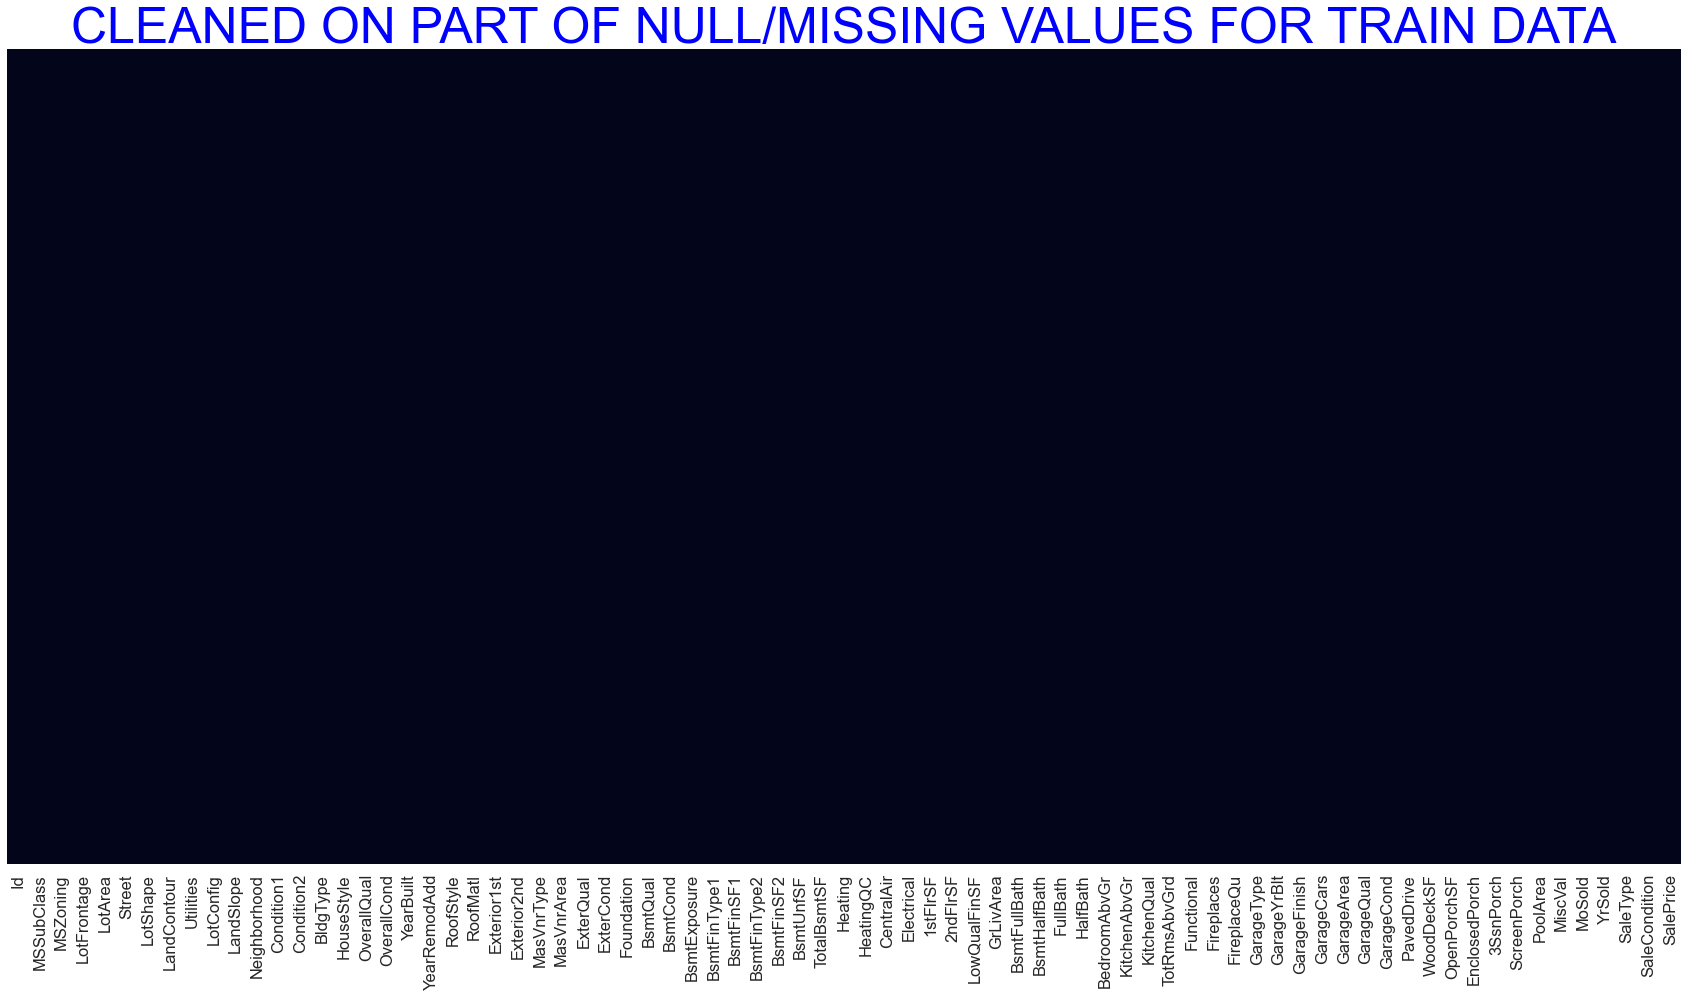

In [23]:
plt.figure(figsize=(30,15))
sns.set(font_scale=1.5)
sns.heatmap(df_train.isnull(),cbar=False,yticklabels=False)
plt.title('CLEANED ON PART OF NULL/MISSING VALUES FOR TRAIN DATA',{'fontsize':50,'color':'blue'})
plt.show()

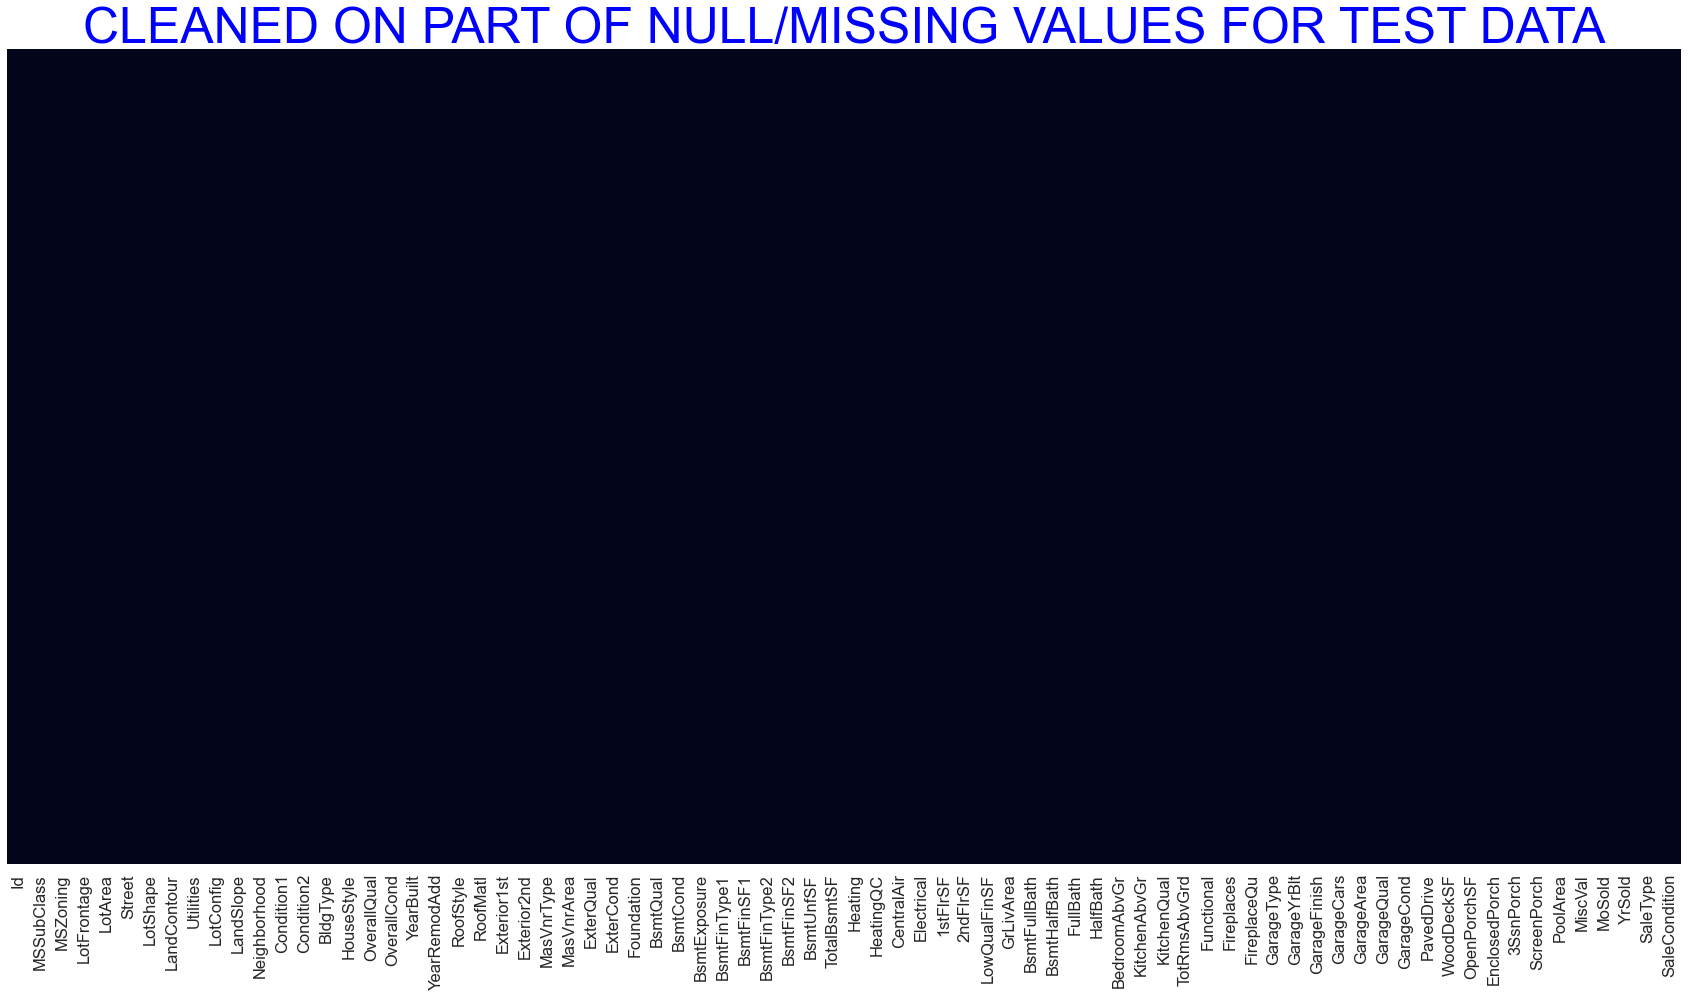

In [24]:
plt.figure(figsize=(30,15))
sns.set(font_scale=1.5)
sns.heatmap(df_test.isnull(),cbar=False,yticklabels=False)
plt.title('CLEANED ON PART OF NULL/MISSING VALUES FOR TEST DATA',{'fontsize':50,'color':'blue'})
plt.show()

### Whole black represents that there are no NULL/MISSING values in the dataset

In [25]:
df_train.shape

(1460, 77)

----------------
## **OUTLIERS TREATMENT
----------------

### FOR LOOP FOR TREATING OUTLIERS

In [26]:
df_filtered = df_train
Continuous_columns=['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF',
'EnclosedPorch','3SsnPorch','ScreenPorch','MiscVal']
for col in df_filtered: #here all the columns of df_train.
    if col in Continuous_columns :  #here all the columns of Continuous_columns list.
            Q1=df_filtered[col].quantile(0.01)
            Q3=df_filtered[col].quantile(0.99)
            df_filtered=df_filtered.drop(df_filtered[(df_filtered[col]>Q3) | (df_filtered[col]<Q1)].index)
    
print(df_filtered.shape)

(1186, 77)


In [27]:
df_filtered.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL     65.00000     8450   Pave      Reg         Lvl   
1   2          20       RL     80.00000     9600   Pave      Reg         Lvl   
2   3          60       RL     68.00000    11250   Pave      IR1         Lvl   
4   5          60       RL     84.00000    14260   Pave      IR1         Lvl   
6   7          20       RL     75.00000    10084   Pave      Reg         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   
6    AllPub    Inside       Gtl      Somerst       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
4     2Story            8            5       2000          2000     Gable   
6     1Story            8            5       2004          2005     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace   196.00000        Gd        TA   
1  CompShg     MetalSd     MetalSd       None     0.00000        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace   162.00000        Gd        TA   
4  CompShg     VinylSd     VinylSd    BrkFace   350.00000        Gd        TA   
6  CompShg     VinylSd     VinylSd      Stone   186.00000        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
4      PConc       Gd       TA           Av          GLQ         655   
6      PConc       Ex       TA           Av          GLQ        1369   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
4          Unf           0        490         1145    GasA        Ex   
6          Unf           0        317         1686    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
4          Y      SBrkr      1145      1053             0       2198   
6          Y      SBrkr      1694         0             0       1694   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
4             1             0         2         1             4             1   
6             1             0         2         0             3             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          Gd             8        Typ           0          Gd     Attchd   
1          TA             6        Typ           1          TA     Attchd   
2          Gd             6        Typ           1          TA     Attchd   
4  

In [28]:
df_filtered_test = df_test

for col in df_filtered_test: #here all the columns of df_train.
    if col in Continuous_columns :  #here all the columns of Continuous_columns list.
            Q1=df_filtered_test[col].quantile(0.01)
            Q3=df_filtered_test[col].quantile(0.99)
            df_filtered_test=df_filtered_test.drop(df_filtered_test[(df_filtered_test[col]>Q3) | (df_filtered_test[col]<Q1)].index)
    
print(df_filtered_test.shape)

(1177, 76)


Range is selected such that one can take 99% values and beyond that there must be outliers in the columns.

In [29]:
#Checking whether outlier loop is properly working
print(df_train['MiscVal'].max(), df_train.shape)
print(df_filtered['MiscVal'].max(),df_filtered.shape)

15500 (1460, 77)
700 (1186, 77)


#### now, we will work on this filtered dataframe - df_filtered

In [30]:
df_filtered.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL     65.00000     8450   Pave      Reg         Lvl   
1   2          20       RL     80.00000     9600   Pave      Reg         Lvl   
2   3          60       RL     68.00000    11250   Pave      IR1         Lvl   
4   5          60       RL     84.00000    14260   Pave      IR1         Lvl   
6   7          20       RL     75.00000    10084   Pave      Reg         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   
6    AllPub    Inside       Gtl      Somerst       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
4     2Story            8            5       2000          2000     Gable   
6     1Story            8            5       2004          2005     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace   196.00000        Gd        TA   
1  CompShg     MetalSd     MetalSd       None     0.00000        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace   162.00000        Gd        TA   
4  CompShg     VinylSd     VinylSd    BrkFace   350.00000        Gd        TA   
6  CompShg     VinylSd     VinylSd      Stone   186.00000        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
4      PConc       Gd       TA           Av          GLQ         655   
6      PConc       Ex       TA           Av          GLQ        1369   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
4          Unf           0        490         1145    GasA        Ex   
6          Unf           0        317         1686    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
4          Y      SBrkr      1145      1053             0       2198   
6          Y      SBrkr      1694         0             0       1694   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
4             1             0         2         1             4             1   
6             1             0         2         0             3             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          Gd             8        Typ           0          Gd     Attchd   
1          TA             6        Typ           1          TA     Attchd   
2          Gd             6        Typ           1          TA     Attchd   
4  

### LIST OF CATEGORICAL AND CONTINUOUS COLUMNS
### CONTINUOUS COLUMNS

In [31]:
continuous_column_names=['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF', 'LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
            'ScreenPorch', 'PoolArea','MiscVal','YrSold','YearBuilt','YearRemodAdd','GarageYrBlt']

### CATEGORICAL COLUMNS

In [32]:
categorical_column_names=['MSSubClass','MSZoning','Street','LotShape','LandContour','Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
             'OverallQual', 'OverallCond', 'RoofStyle','RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType','ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
             'BsmtExposure', 'BsmtFinType1','BsmtFinType2','Heating', 'HeatingQC','CentralAir', 'Electrical','BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
             'BedroomAbvGr', 'KitchenAbvGr','KitchenQual', 'TotRmsAbvGrd','Functional', 'Fireplaces', 'FireplaceQu', 'GarageType','GarageFinish', 'GarageCars',
             'GarageQual', 'GarageCond','PavedDrive','SaleType','SaleCondition','MoSold']

----------------
## **CHECKING KURTOSIS AND SKEWNESS OF COLUMNS
-------------

### KURTOSIS

In [33]:
df_filtered[continuous_column_names].kurt().sort_values(ascending=False)

PoolArea        598.68564
LowQualFinSF    239.37485
3SsnPorch       121.64418
MiscVal          43.47277
BsmtFinSF2       14.63110
ScreenPorch      13.90131
EnclosedPorch     6.56515
LotArea           4.96653
MasVnrArea        3.22264
OpenPorchSF       2.01659
LotFrontage       1.60652
TotalBsmtSF       0.63939
WoodDeckSF        0.43582
GarageArea        0.37441
BsmtUnfSF        -0.02556
GrLivArea        -0.14794
GarageYrBlt      -0.41836
YearBuilt        -0.44891
1stFlrSF         -0.47152
BsmtFinSF1       -0.73770
2ndFlrSF         -1.07841
YrSold           -1.20173
YearRemodAdd     -1.33124
dtype: float64

### SKEWNESS

If the skewness is between -0.5 and 0.5, the data are fairly symmetrical

If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed

If the skewness is less than -1 or greater than 1, the data are highly skewed

In [34]:
df_filtered[continuous_column_names].skew().sort_values(ascending=False)

PoolArea        24.44683
LowQualFinSF    14.84466
3SsnPorch       11.02654
MiscVal          6.58708
ScreenPorch      3.85854
BsmtFinSF2       3.84829
EnclosedPorch    2.76527
MasVnrArea       1.83615
OpenPorchSF      1.54215
LotArea          1.19145
WoodDeckSF       1.10622
BsmtUnfSF        0.77805
2ndFlrSF         0.68307
BsmtFinSF1       0.55794
1stFlrSF         0.53083
GrLivArea        0.52515
LotFrontage      0.24501
YrSold           0.08058
TotalBsmtSF     -0.12290
GarageArea      -0.15999
YearRemodAdd    -0.46095
YearBuilt       -0.60053
GarageYrBlt     -0.68353
dtype: float64

### Fixing the skewness of the columns using log function or sqrt function

#### PoolArea

In [35]:
fig,axes=plt.subplots(1,2,figsize=(10,4))
sns.set(font_scale=1.25)
sns.distplot(df_filtered.PoolArea,ax=axes[0],bins=50)
axes[0].set_title('Distribution of PoolArea with skewness')

sns.distplot(ax=axes[1],x=np.log(df_filtered.PoolArea.apply(lambda x:x+1)))
axes[1].set_title('Distribution of PoolArea after log function')

plt.tight_layout()
plt.show()

The data is mainly centered around 0, although max range of data is around 600 but nearly all data points are 0 since most houses don't have a pool. It has very poor correlation with the Target variable(0.005) 

The Log transform also didn't affect the skewness as most datapoints are equal and 0.
Therefore, we can drop this column from training data.

#### LowQualFinSF

In [36]:
fig,axes=plt.subplots(1,2,figsize=(10,4))
sns.set(font_scale=1.25)
sns.distplot(df_filtered.LowQualFinSF,ax=axes[0],bins=50)
axes[0].set_title('Distribution of LowQualFinSF with skewness')

sns.distplot(ax=axes[1],x=np.log(df_filtered.LowQualFinSF.apply(lambda x:x+1)))
axes[1].set_title('Distribution of LowQualFinSF after log function')

plt.tight_layout()
plt.show()

In [37]:
df_filtered.LowQualFinSF.max()

205

It has very poor correlation with the Target variable(-0.05) 

The Log transform also didn't affect the skewness as most datapoints are equal and 0.
Therefore, we can drop this column from training data.

#### 3SsnPorch

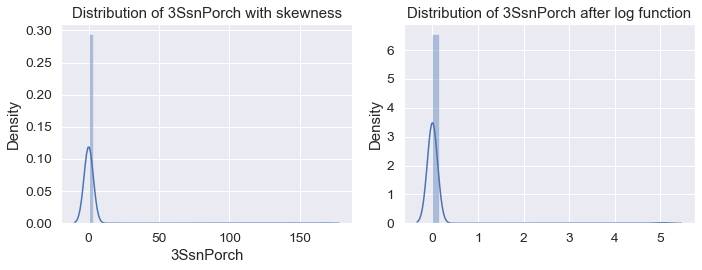

In [38]:
fig,axes=plt.subplots(1,2,figsize=(10,4))
sns.set(font_scale=1.25)
sns.distplot(df_filtered['3SsnPorch'],ax=axes[0],bins=50)
axes[0].set_title('Distribution of 3SsnPorch with skewness')

sns.distplot(ax=axes[1],x=np.log(df_filtered['3SsnPorch'].apply(lambda x:x+1)))
axes[1].set_title('Distribution of 3SsnPorch after log function')

plt.tight_layout()
plt.show()

In [39]:
df_filtered['3SsnPorch'].max()

168

It has very poor correlation with the Target variable(0.08) 

The Log transform also didn't affect the skewness as most datapoints are equal and 0.
Therefore, we can drop this column from training data.

### MiscVal

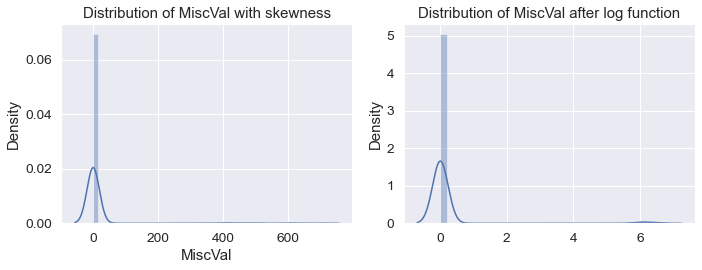

In [40]:
fig,axes=plt.subplots(1,2,figsize=(10,4))
sns.set(font_scale=1.25)
sns.distplot(df_filtered['MiscVal'],ax=axes[0],bins=50)
axes[0].set_title('Distribution of MiscVal with skewness')

sns.distplot(ax=axes[1],x=np.log(df_filtered['MiscVal'].apply(lambda x:x+1)))
axes[1].set_title('Distribution of MiscVal after log function')

plt.tight_layout()
plt.show()

It has very poor correlation with the Target variable(-0.06) 

The Log transform also didn't affect the skewness as most datapoints are equal and 0.
Therefore, we can drop this column from training data.

### ScreenPorch

In [41]:
fig,axes=plt.subplots(1,2,figsize=(10,4))
sns.set(font_scale=1.25)
sns.distplot(df_filtered['ScreenPorch'],ax=axes[0],bins=50)
axes[0].set_title('Distribution of ScreenPorch with skewness')

sns.distplot(ax=axes[1],x=np.log(df_filtered['ScreenPorch'].apply(lambda x:x+1)))
axes[1].set_title('Distribution of ScreenPorch after log function')

plt.tight_layout()
plt.show()

It has very poor correlation with the Target variable(0.05) 

The Log transform also didn't affect the skewness as most datapoints are equal and 0.
Therefore, we can drop this column from training data.

### BsmtFinSF2

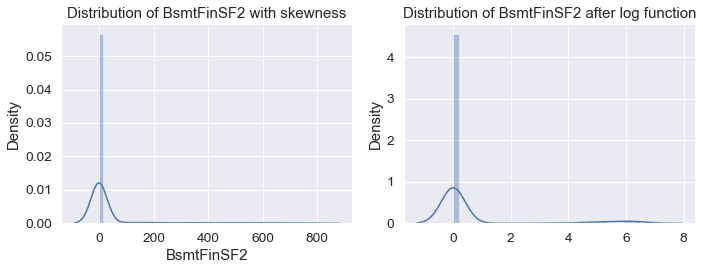

In [42]:
fig,axes=plt.subplots(1,2,figsize=(10,4))
sns.set(font_scale=1.25)
sns.distplot(df_filtered['BsmtFinSF2'],ax=axes[0],bins=50)
axes[0].set_title('Distribution of BsmtFinSF2 with skewness')

sns.distplot(ax=axes[1],x=np.log(df_filtered['BsmtFinSF2'].apply(lambda x:x+1)))
axes[1].set_title('Distribution of BsmtFinSF2 after log function')

plt.tight_layout()
plt.show()

It has very poor correlation with the Target variable(-0.08) 

The Log transform also didn't affect the skewness as most datapoints are equal and 0.
Therefore, we can drop this column from training data.

### EnclosedPorch

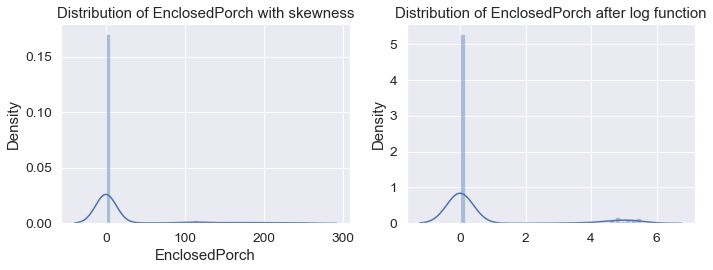

In [43]:
fig,axes=plt.subplots(1,2,figsize=(10,4))
sns.set(font_scale=1.25)
sns.distplot(df_filtered.EnclosedPorch,ax=axes[0],bins=50)
axes[0].set_title('Distribution of EnclosedPorch with skewness')

sns.distplot(ax=axes[1],x=np.log(df_filtered.EnclosedPorch.apply(lambda x:x+1)))
axes[1].set_title('Distribution of EnclosedPorch after log function')

plt.tight_layout()
plt.show()

It has very poor correlation with the Target variable(-0.17) 

The Log transform also didn't affect the skewness as most datapoints are equal and 0.
Therefore, we can drop this column from training data.

#### All the above skewed columns having it's most datapoints as 0 and having poor correlation with the target variable.
#### So we can remove these columns 

### List of skewed columns which should be removed

In [44]:
skewed_columns=['EnclosedPorch','BsmtFinSF2','ScreenPorch','MiscVal','3SsnPorch','LowQualFinSF','PoolArea']

In [45]:
df_filtered_without_skewed_columns=df_filtered.drop(skewed_columns,axis=1)
df_filtered_without_skewed_columns.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL     65.00000     8450   Pave      Reg         Lvl   
1   2          20       RL     80.00000     9600   Pave      Reg         Lvl   
2   3          60       RL     68.00000    11250   Pave      IR1         Lvl   
4   5          60       RL     84.00000    14260   Pave      IR1         Lvl   
6   7          20       RL     75.00000    10084   Pave      Reg         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   
6    AllPub    Inside       Gtl      Somerst       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
4     2Story            8            5       2000          2000     Gable   
6     1Story            8            5       2004          2005     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace   196.00000        Gd        TA   
1  CompShg     MetalSd     MetalSd       None     0.00000        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace   162.00000        Gd        TA   
4  CompShg     VinylSd     VinylSd    BrkFace   350.00000        Gd        TA   
6  CompShg     VinylSd     VinylSd      Stone   186.00000        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
4      PConc       Gd       TA           Av          GLQ         655   
6      PConc       Ex       TA           Av          GLQ        1369   

  BsmtFinType2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir  \
0          Unf        150          856    GasA        Ex          Y   
1          Unf        284         1262    GasA        Ex          Y   
2          Unf        434          920    GasA        Ex          Y   
4          Unf        490         1145    GasA        Ex          Y   
6          Unf        317         1686    GasA        Ex          Y   

  Electrical  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0      SBrkr       856       854       1710             1             0   
1      SBrkr      1262         0       1262             0             1   
2      SBrkr       920       866       1786             1             0   
4      SBrkr      1145      1053       2198             1             0   
6      SBrkr      1694         0       1694             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd  \
0         2         1             3             1          Gd             8   
1         2         0             3             1          TA             6   
2         2         1             3             1          Gd             6   
4         2         1             4             1          Gd             9   
6         2         0             3             1          Gd             7   

  Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  \
0        Typ           0          Gd     Attchd   2003.00000          RFn   
1        Typ           1          TA     Attchd   1976.00000          RFn   
2        Typ           1          TA     Attchd   2001.00000          RFn   
4  

##### NOW WILL WORK WITH THIS COLUMN => df_filtered_without_skewed_columns

-----------------------
--------------------------

### SKEWNESS OF THE TARGET VARIABLE

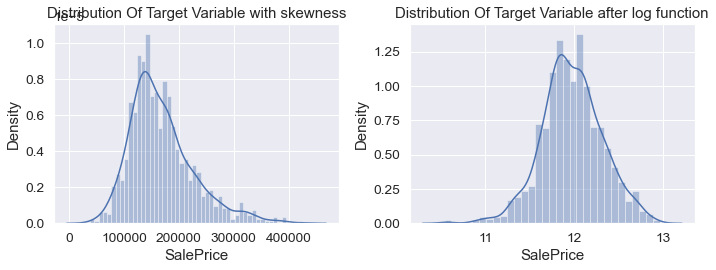

In [46]:
fig,axes=plt.subplots(1,2,figsize=(10,4))
sns.set(font_scale=1.25)
sns.distplot(df_filtered_without_skewed_columns.SalePrice,ax=axes[0],bins=50)
axes[0].set_title('Distribution Of Target Variable with skewness')

sns.distplot(np.log(df_filtered_without_skewed_columns.SalePrice),ax=axes[1])
axes[1].set_title('Distribution Of Target Variable after log function')

plt.tight_layout()
plt.show()

The target variable is has skewness of 1.026963274821543 and after applying log function now skewness is -0.09275355232871305

## FIXING SKEW IN QUANTITATIVE COLUMNS

In [47]:
#TARGET VARIABLE
df_filtered_without_skewed_columns['SalePrice']=np.log(df_filtered_without_skewed_columns.SalePrice)

In [48]:
def valid_columns(columns, dataframe):
    return [x for x in columns if x in dataframe.columns]

In [49]:
# REMAINING INDEPENDENT VARIABLES
def skew_correct(col):
    if (col.skew()>1):
        return np.sqrt(col)
    else:
        return col

continuous_without_skew_cols = valid_columns(continuous_column_names, df_filtered_without_skewed_columns)
df_filtered_without_skewed_columns[continuous_without_skew_cols] = df_filtered_without_skewed_columns[continuous_without_skew_cols].apply(skew_correct, axis=0)

-----------------------
## **VISUALIZATIONS
------------------

----------------
### UNIVARIATE ANALYSIS(VISUAL) OF CATEGORICAL COLUMNS
-------------

In [50]:
df_Categorical_columns=df_filtered[categorical_column_names]
df_Categorical_columns.shape

(1186, 52)

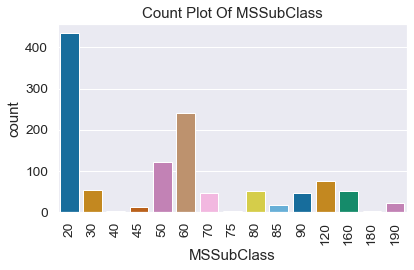

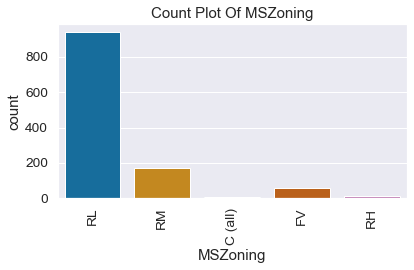

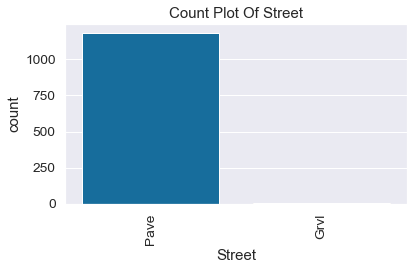

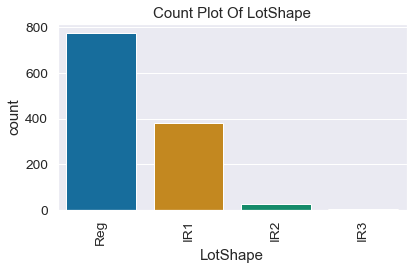

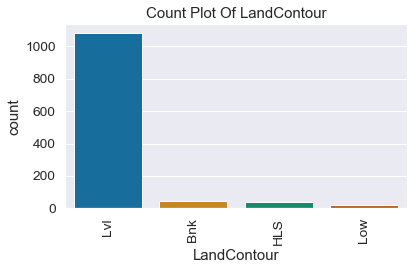

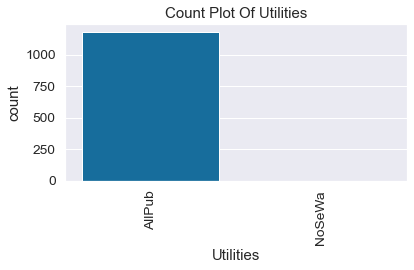

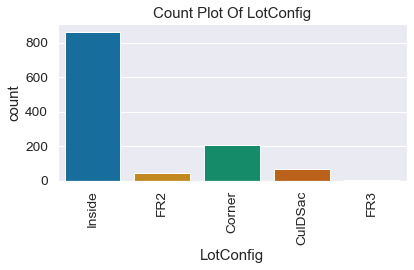

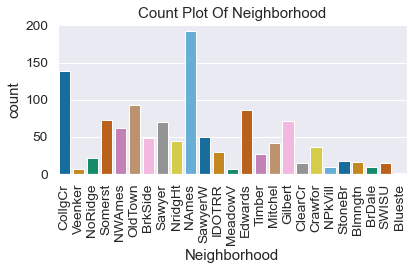

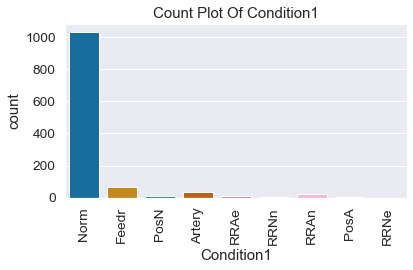

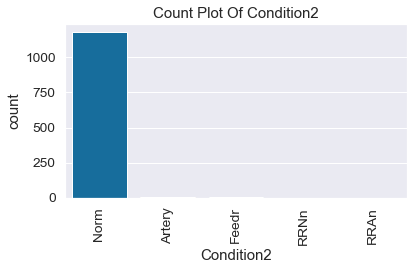

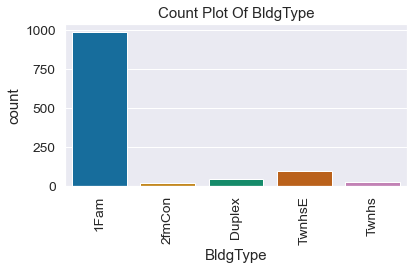

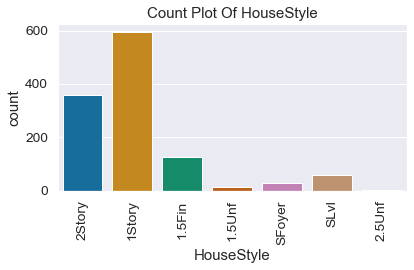

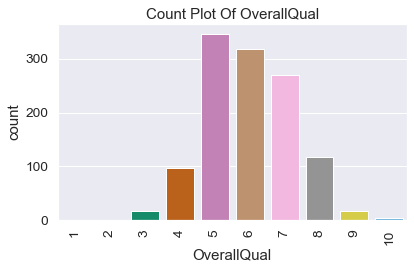

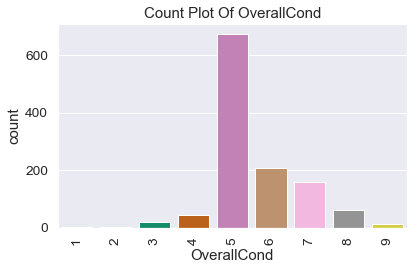

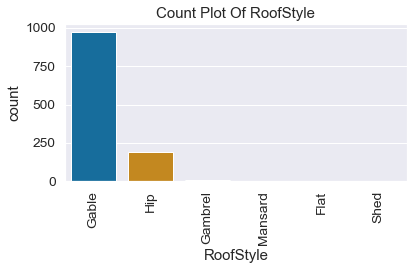

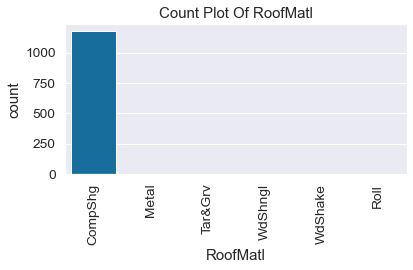

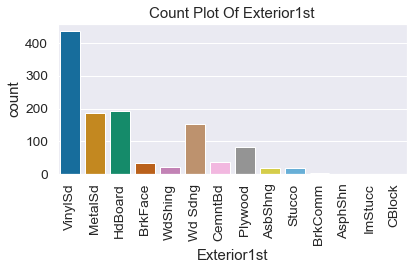

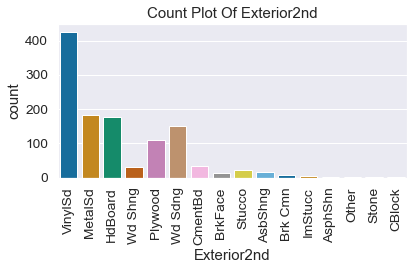

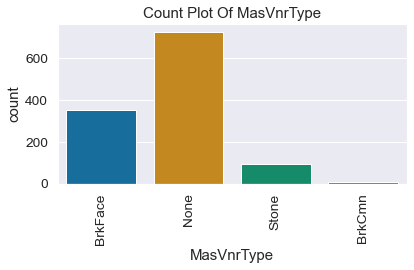

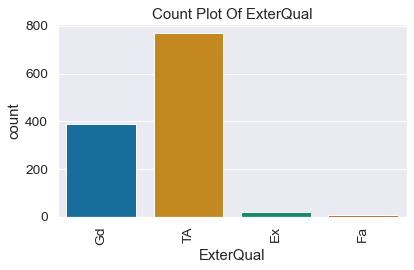

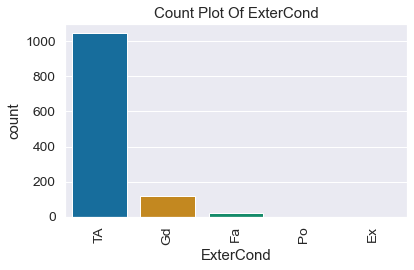

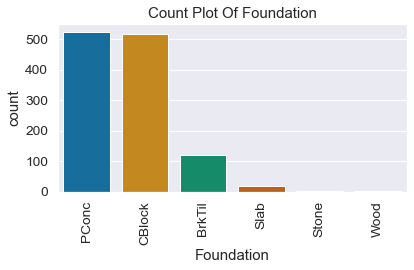

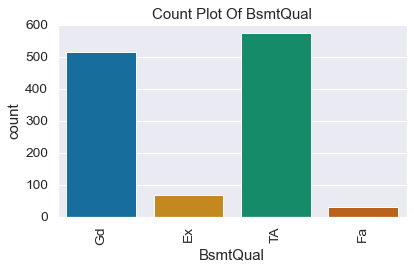

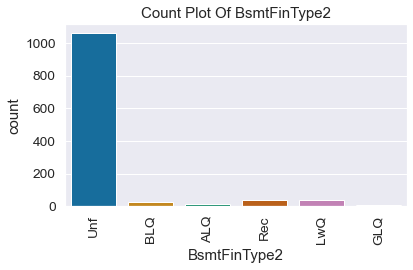

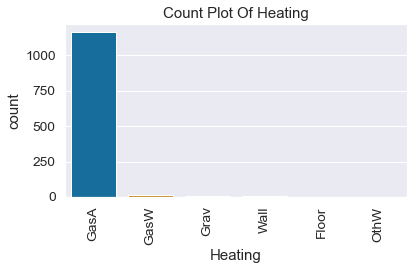

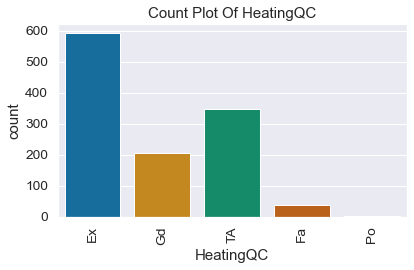

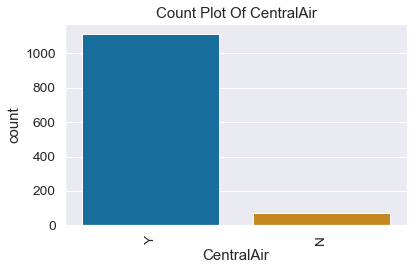

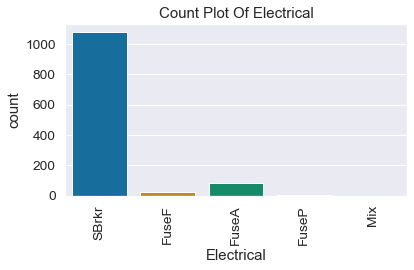

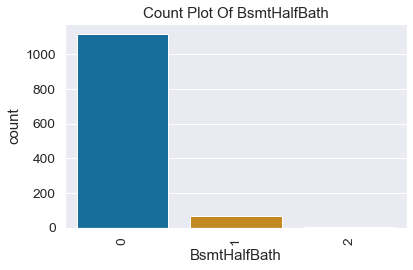

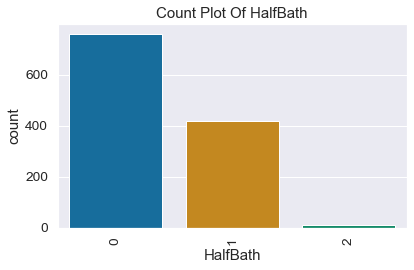

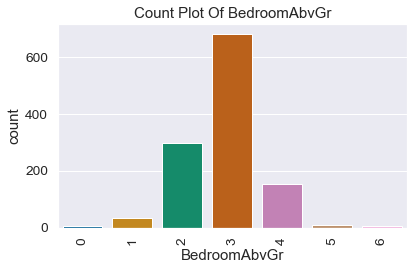

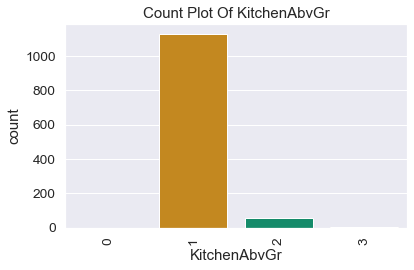

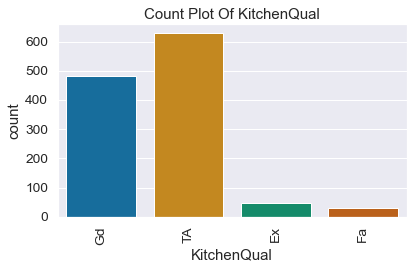

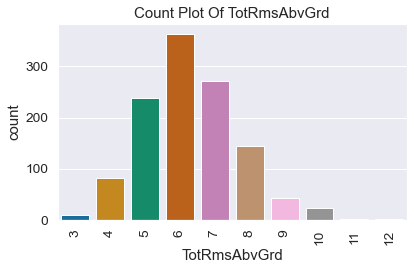

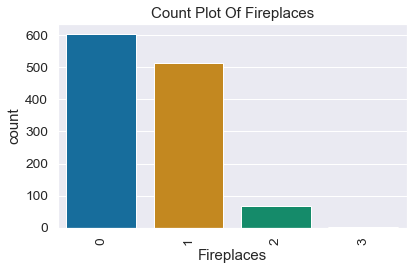

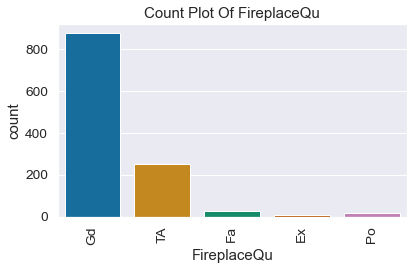

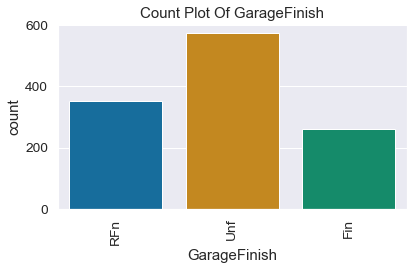

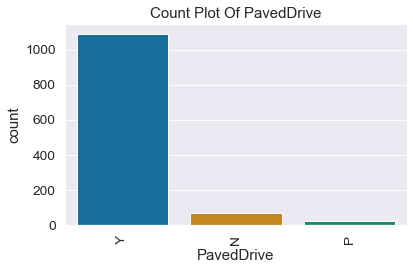

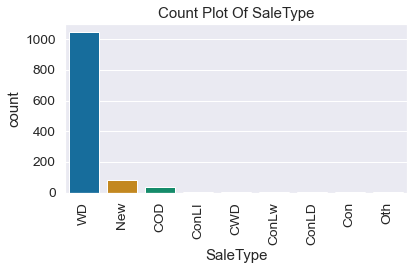

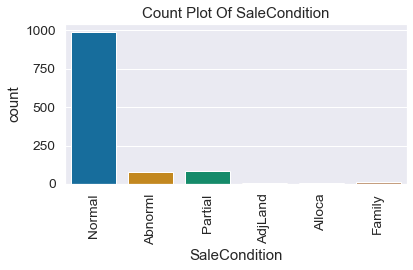

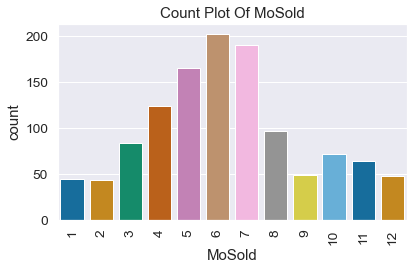

In [51]:
for col in df_Categorical_columns:
    plt.figure()
    sns.set(font_scale=1.25)
    ax=sns.countplot(df_Categorical_columns[col],palette="colorblind")
    plt.title(f'Count Plot Of {col}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
    
    plt.tight_layout()
    plt.show()

-----------------
### UNIVARIATE ANALYSIS(VISUAL) OF CONTINUOUS COLUMNS
--------------

In [52]:
list_filtered_continuous_column = valid_columns(continuous_column_names, df_filtered_without_skewed_columns)
df_Continuous_column=df_filtered_without_skewed_columns[list_filtered_continuous_column]
df_Continuous_column.shape

(1186, 16)

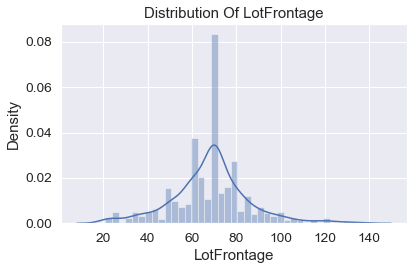

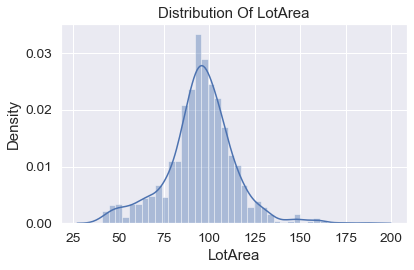

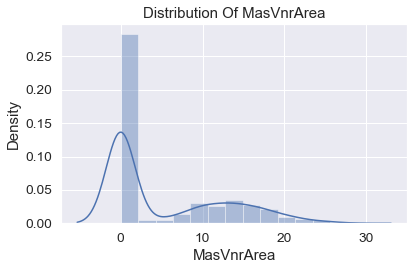

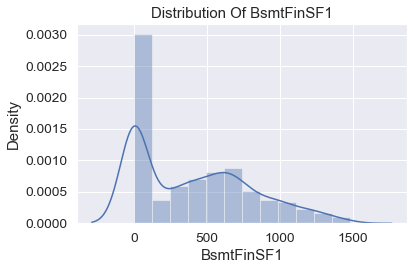

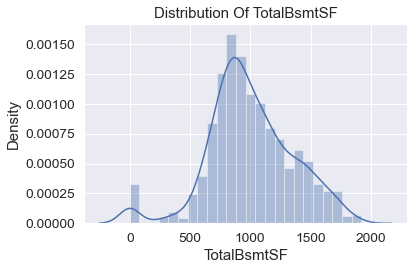

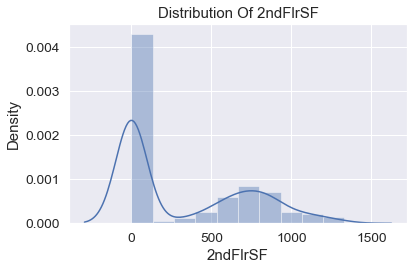

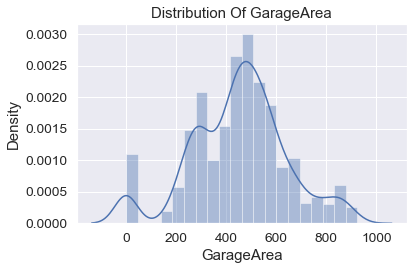

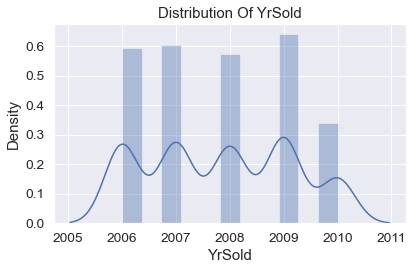

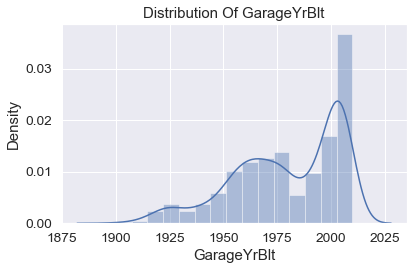

In [53]:
for col in df_Continuous_column:
    plt.figure()
    sns.set(font_scale=1.25)
    ax=sns.distplot(df_Continuous_column[col])
    plt.title(f'Distribution Of {col}')
    #ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
    
    plt.tight_layout()
    plt.show()

### BIVARIATE(VISUAL) ANALYSIS BETWEEN
#### 1.CONTINUOUS AND TARGET VARIABLES
#### 2.CATEGORICAL AND TARGET VARIABLES

#### 1. Continuous and target variable

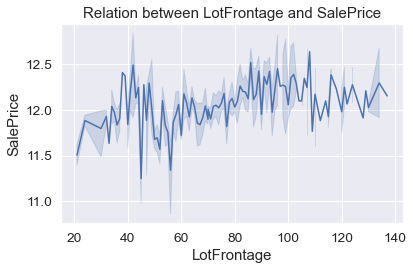

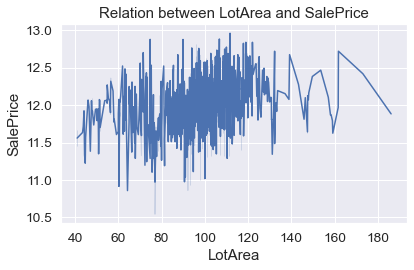

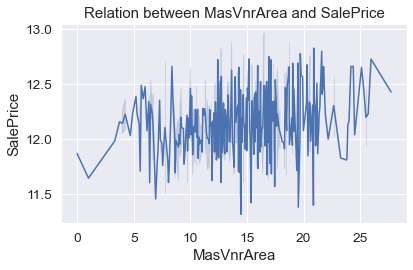

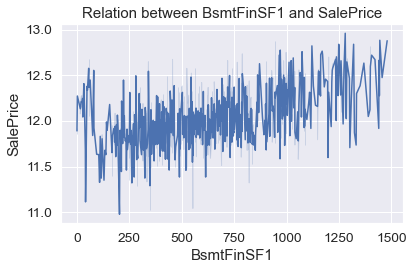

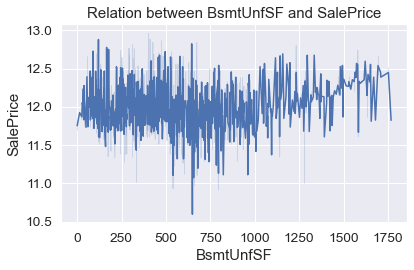

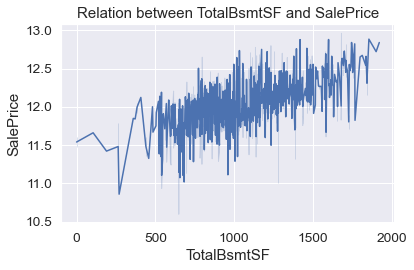

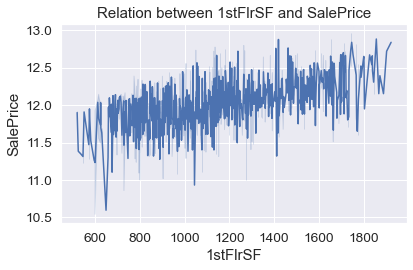

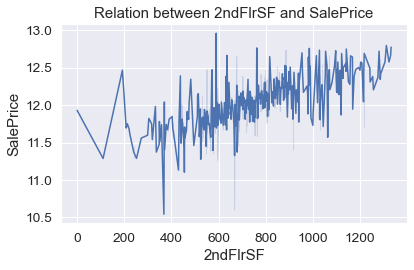

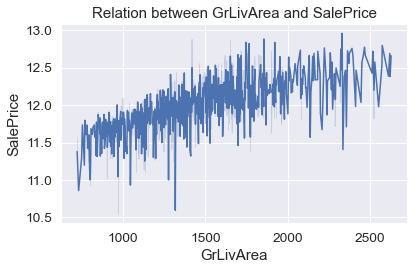

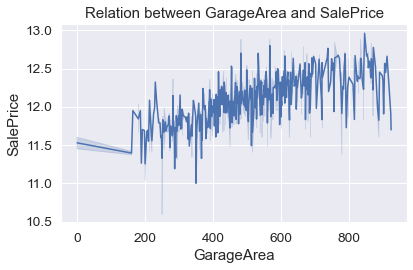

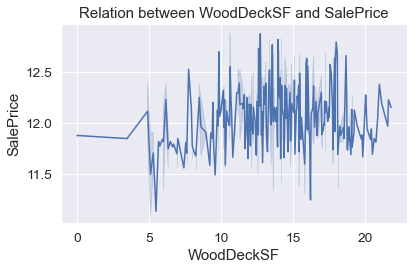

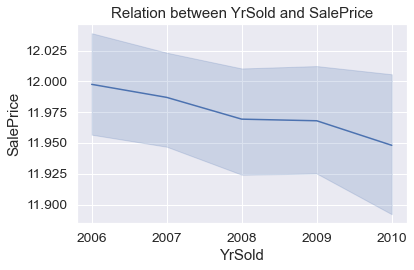

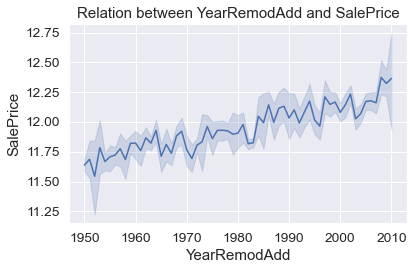

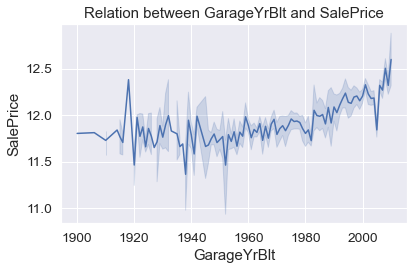

In [54]:
for col in df_Continuous_column:
    sns.set(font_scale=1.25)
    sns.lineplot(x=df_Continuous_column[col],y=df_filtered_without_skewed_columns.SalePrice)
    plt.title(f'Relation between {col} and SalePrice')
    plt.tight_layout()
    plt.show()

#### 2. Categorical and target variable

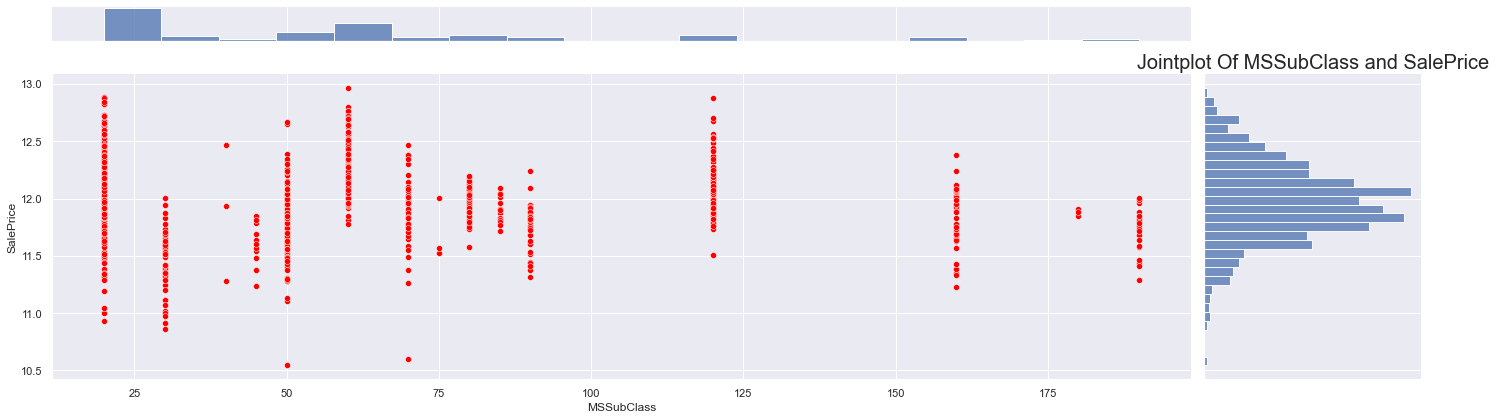

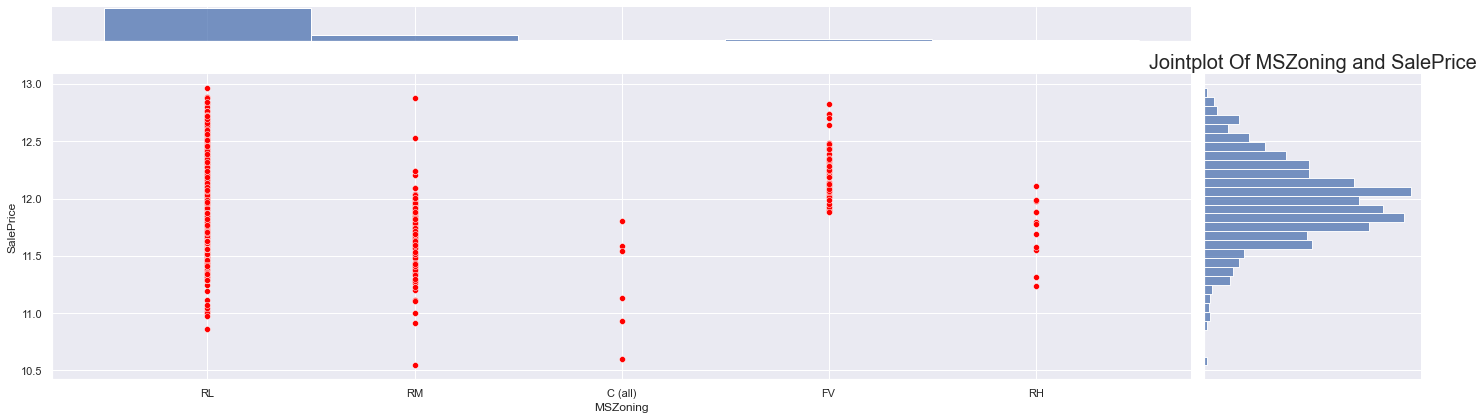

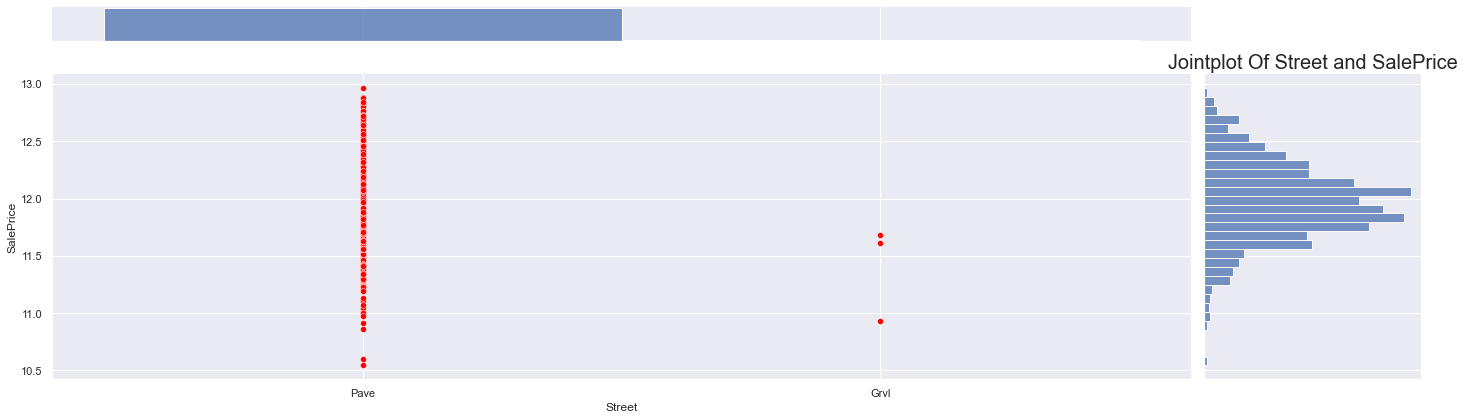

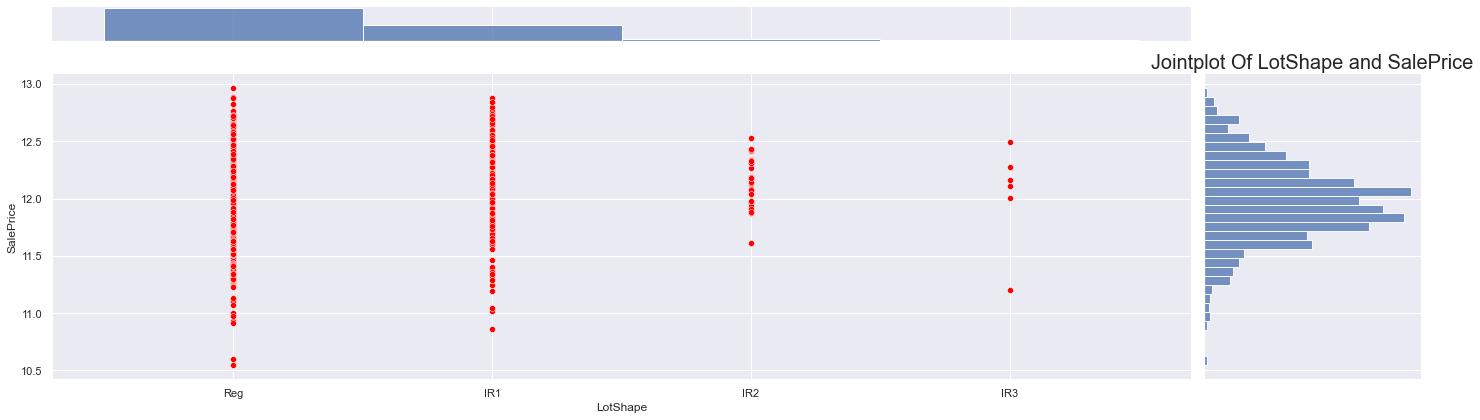

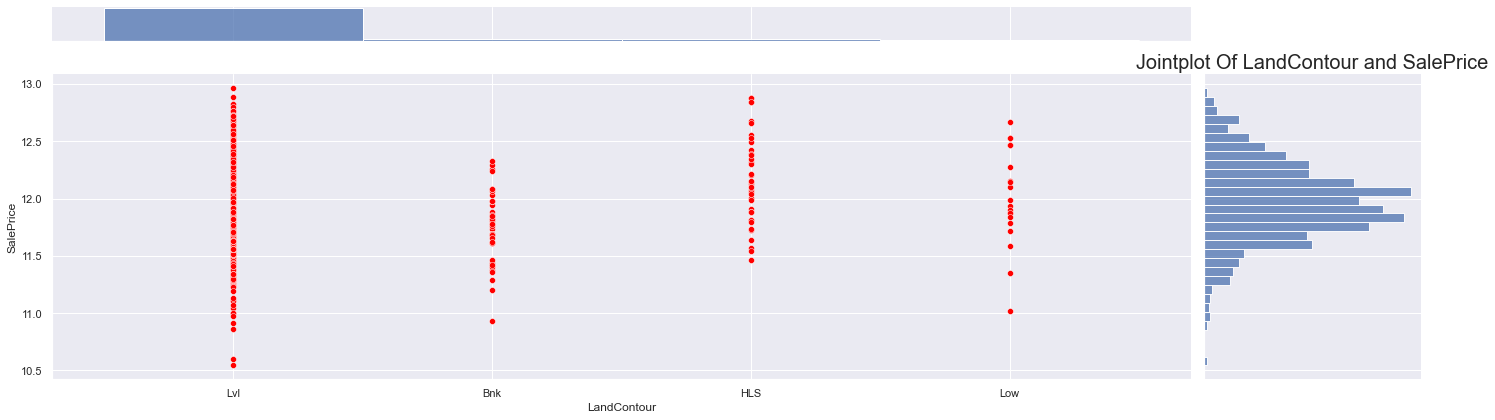

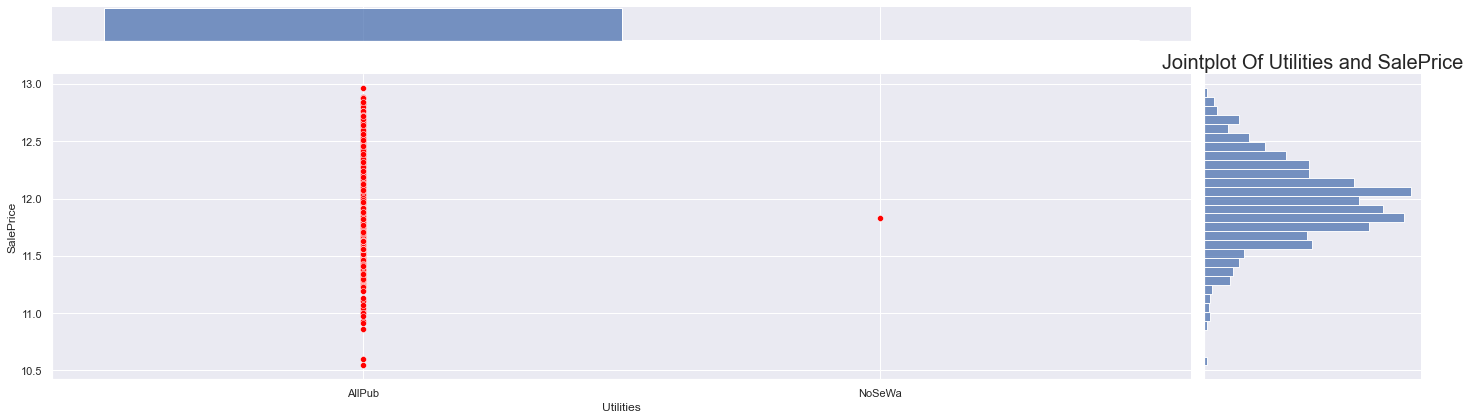

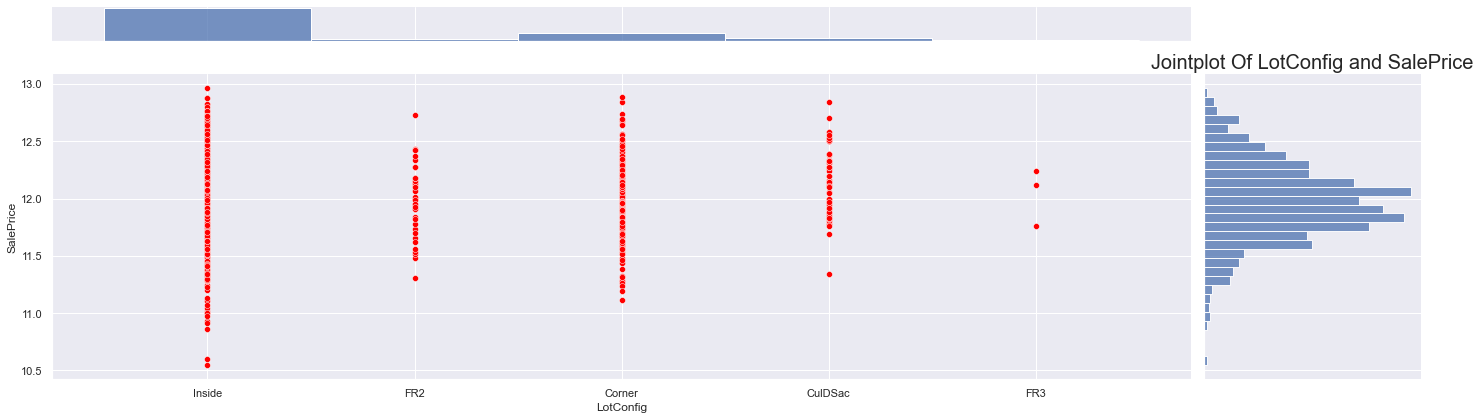

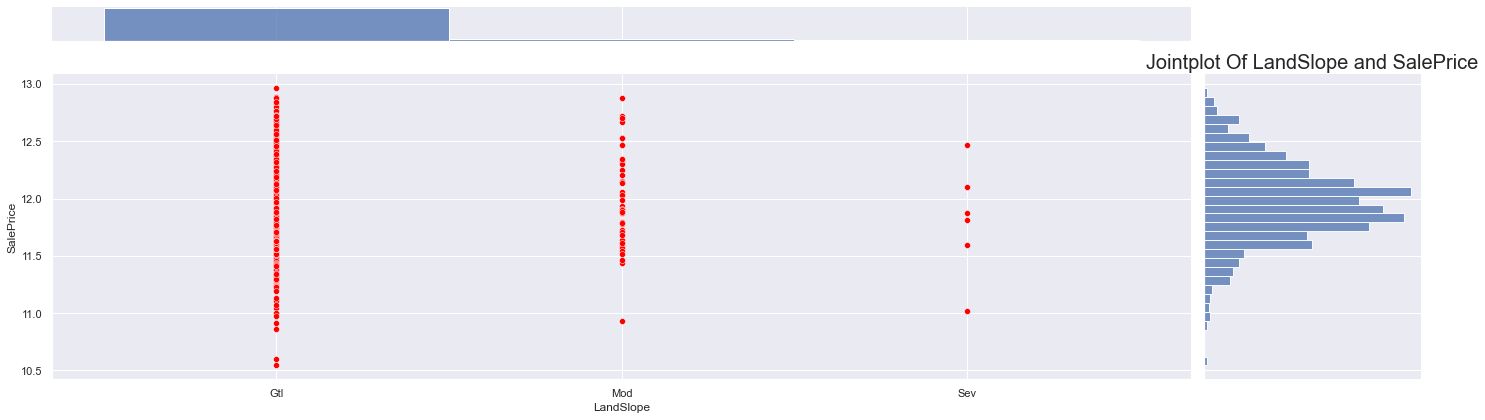

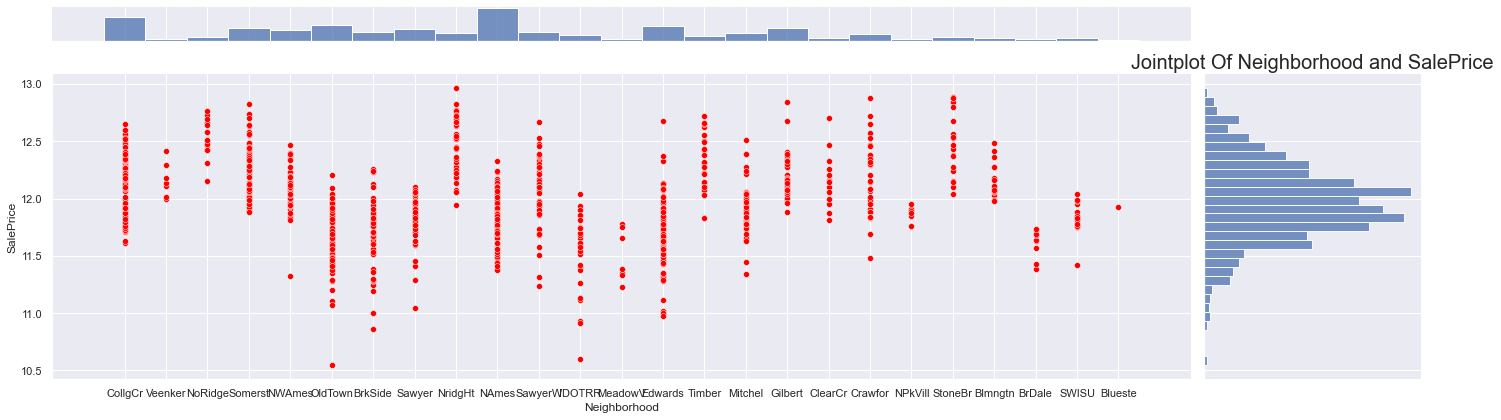

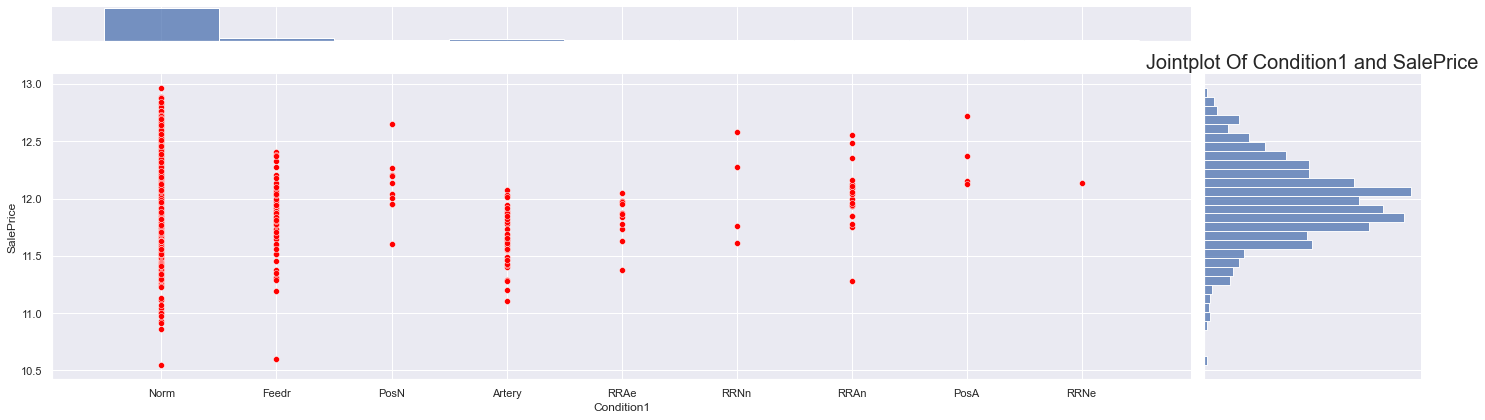

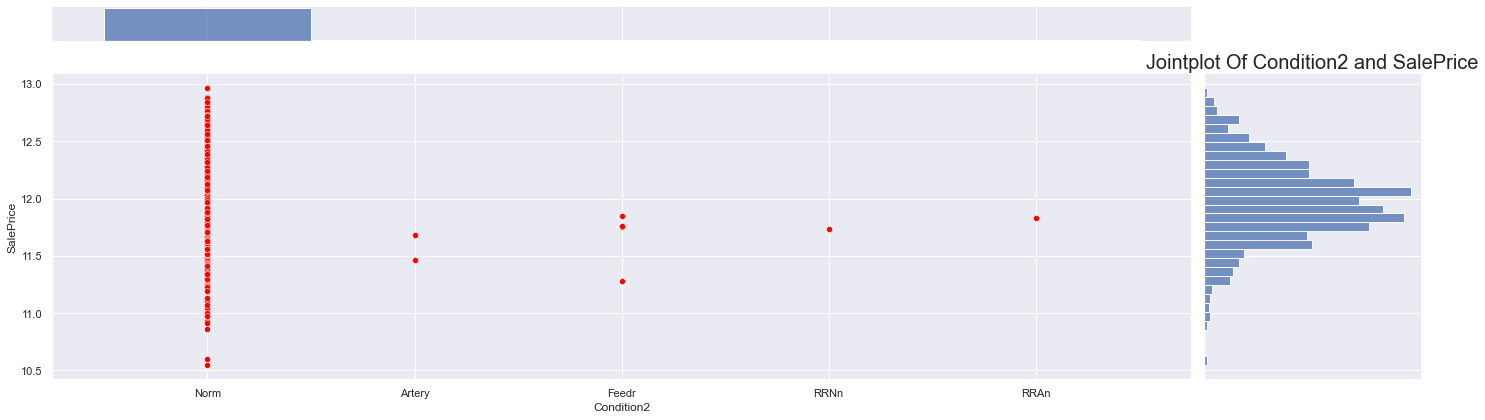

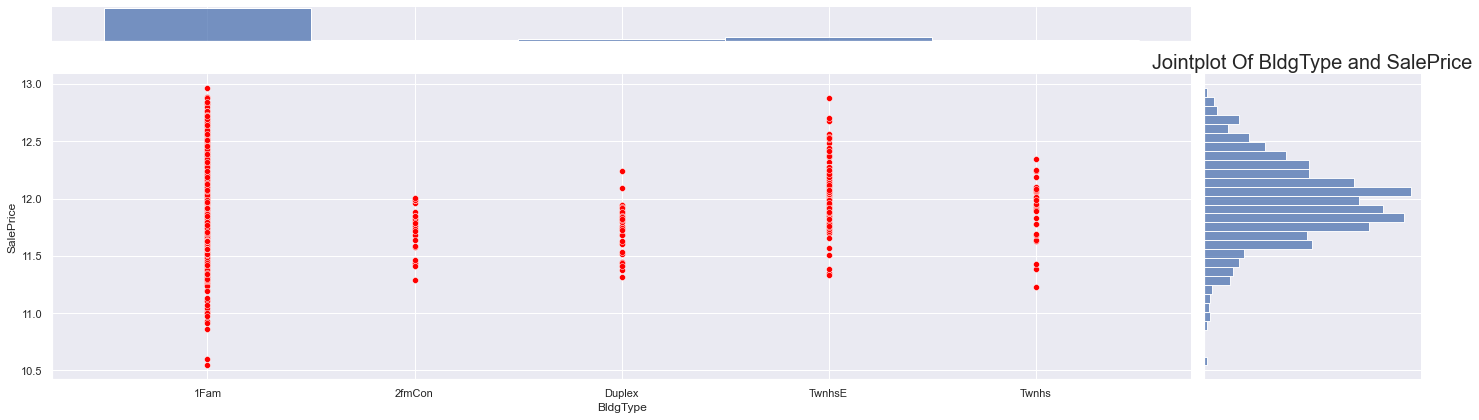

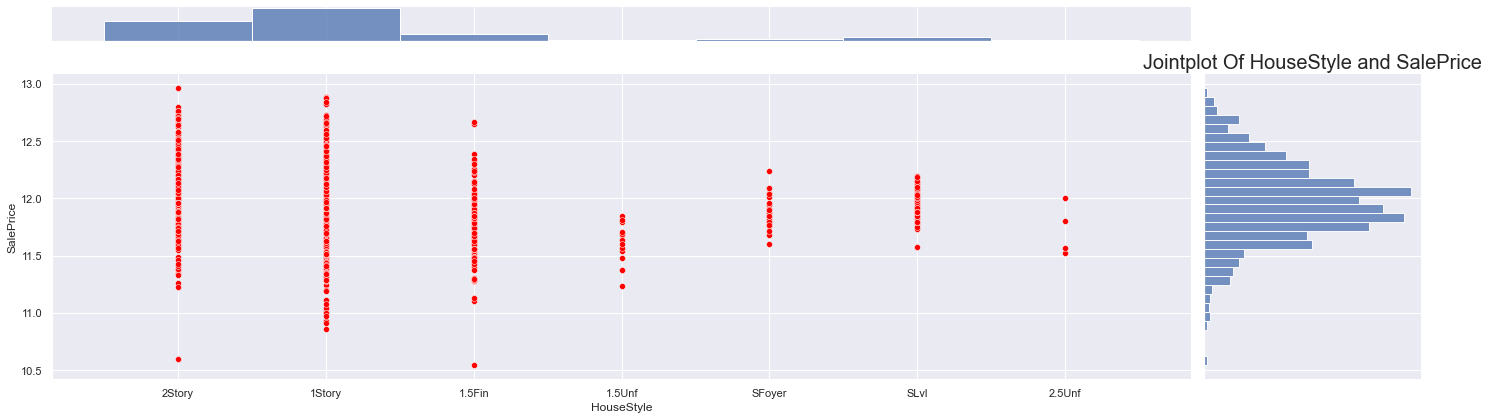

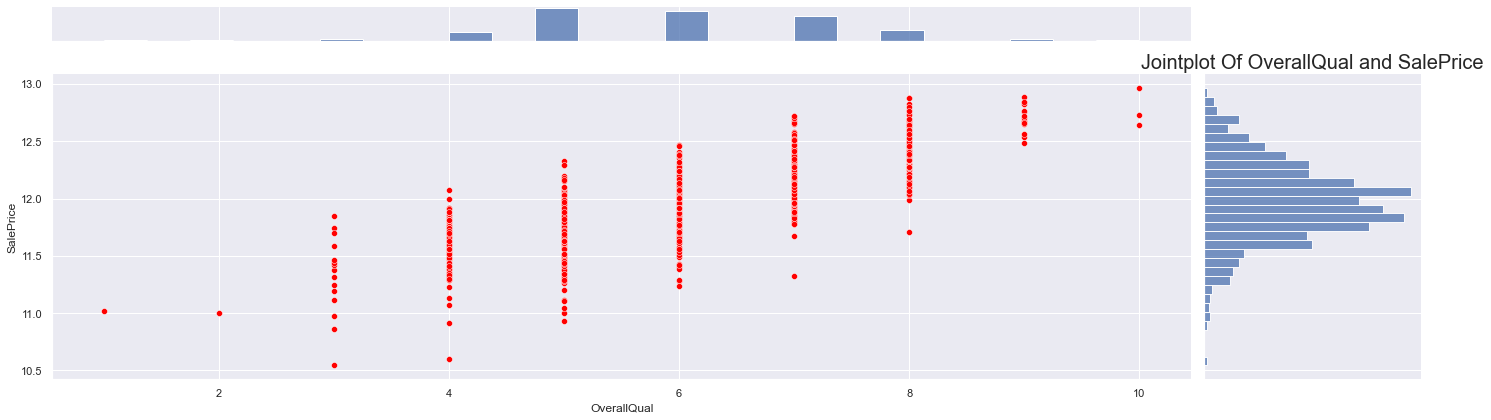

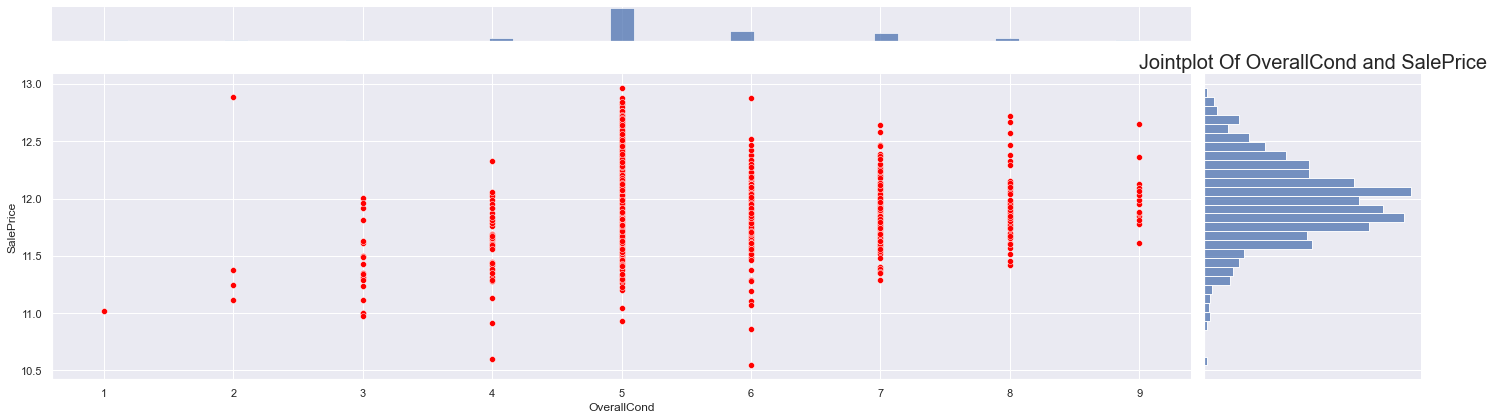

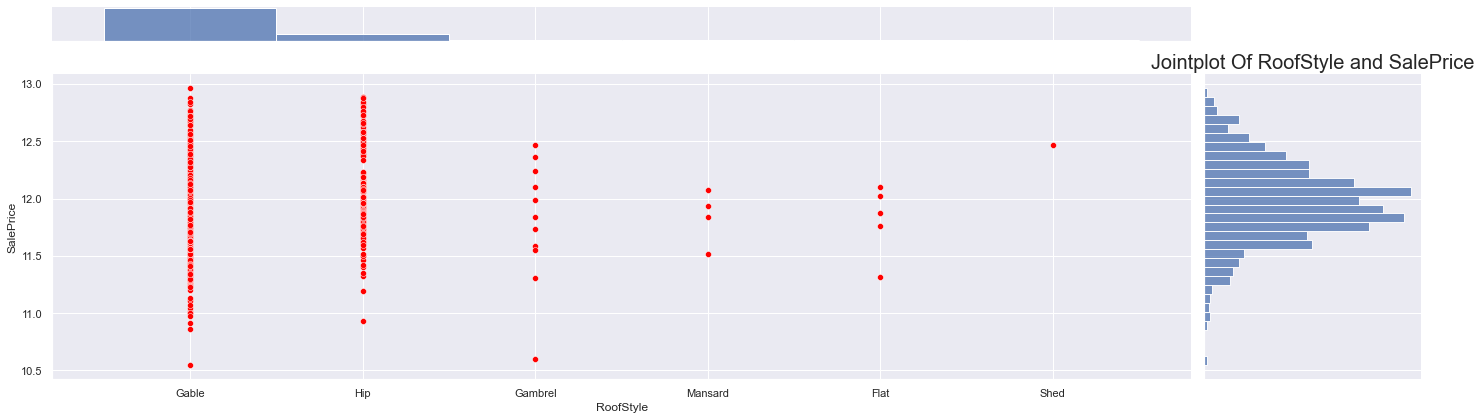

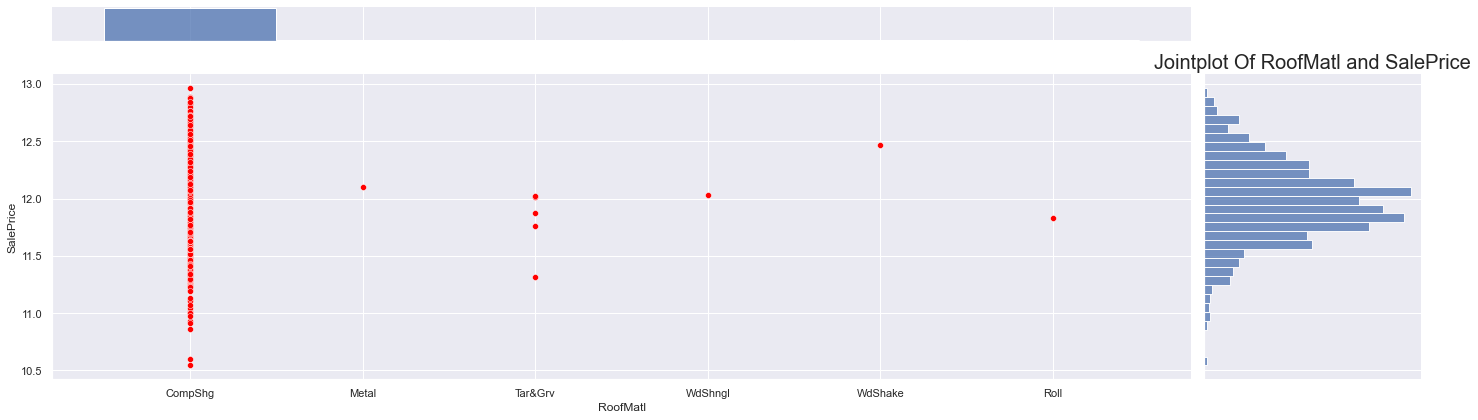

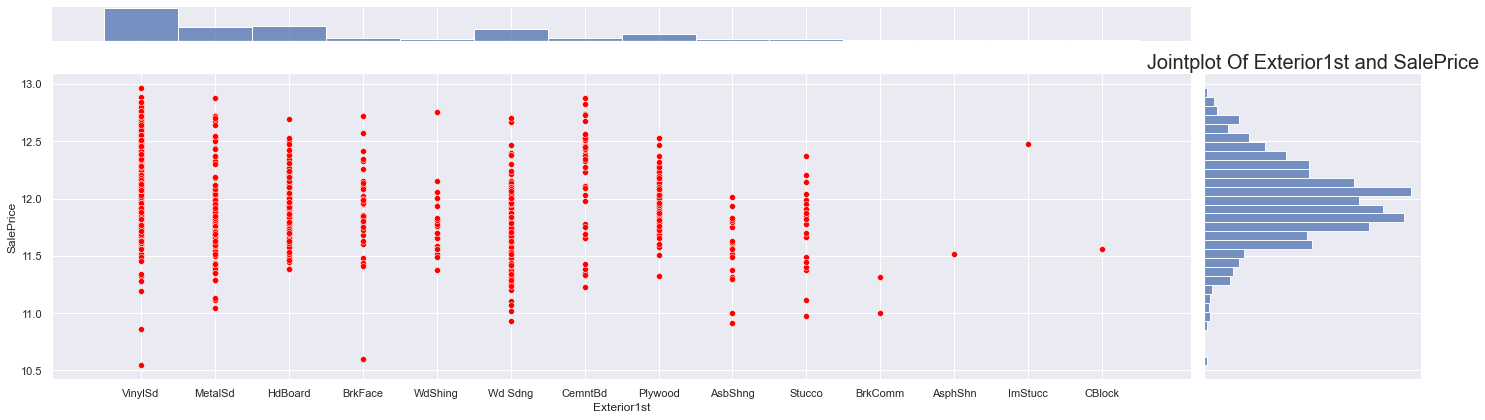

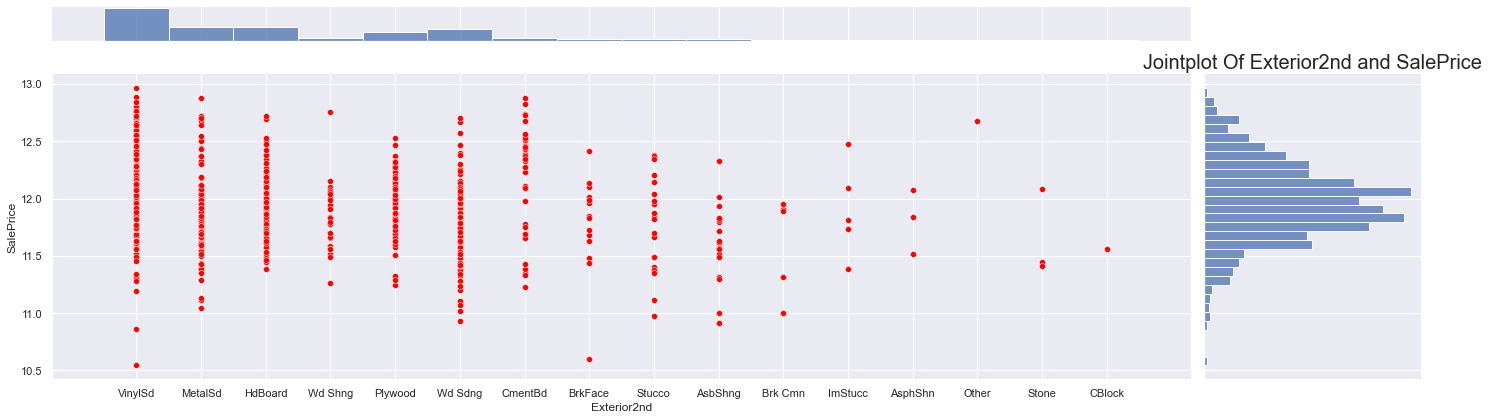

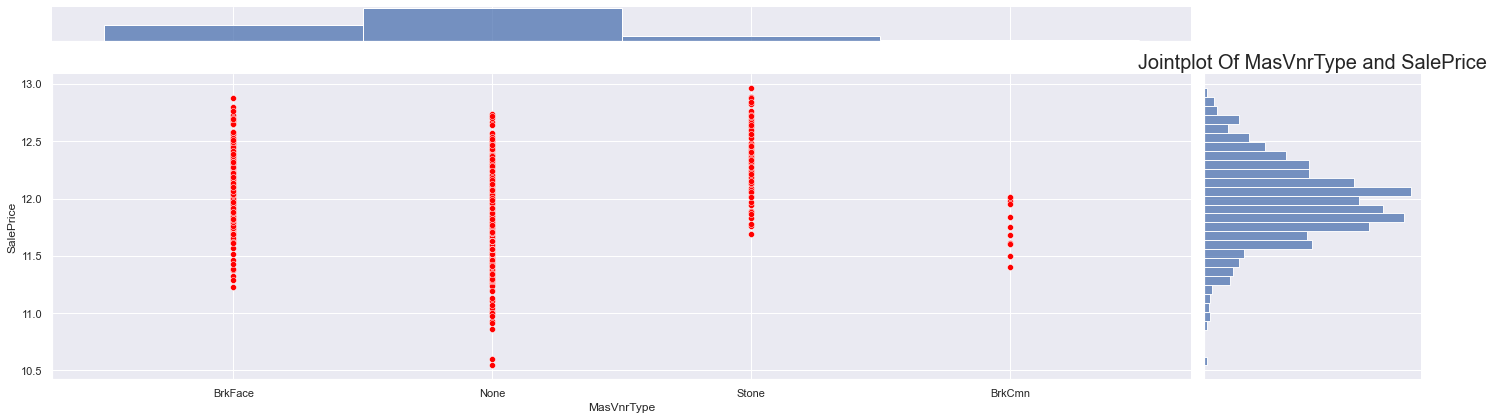

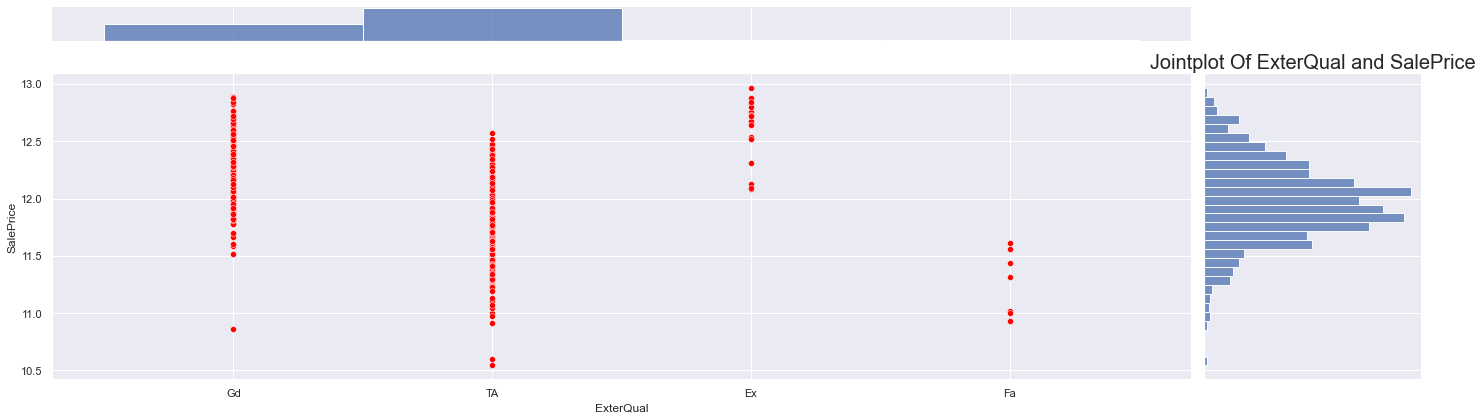

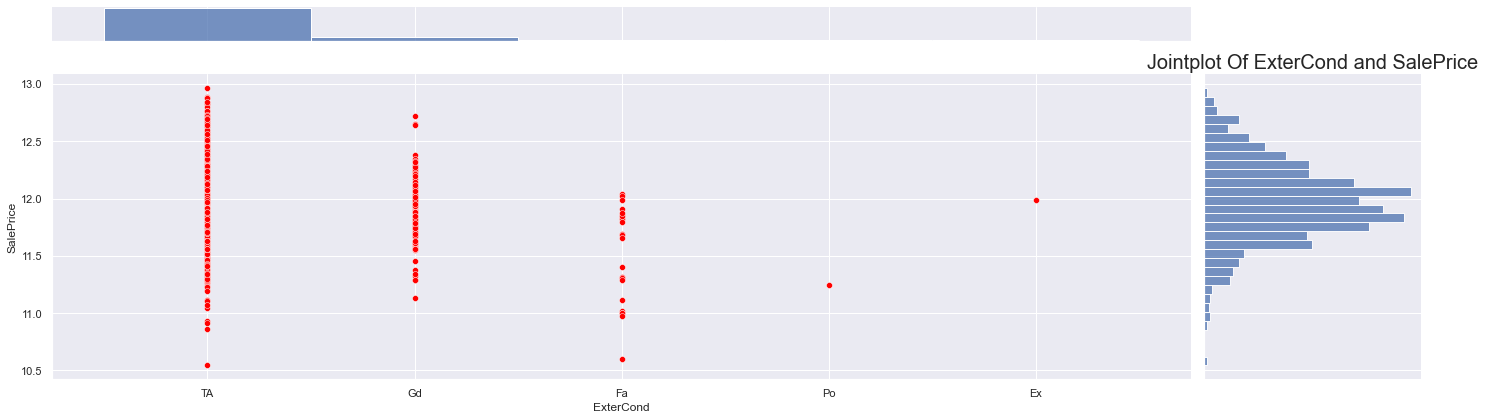

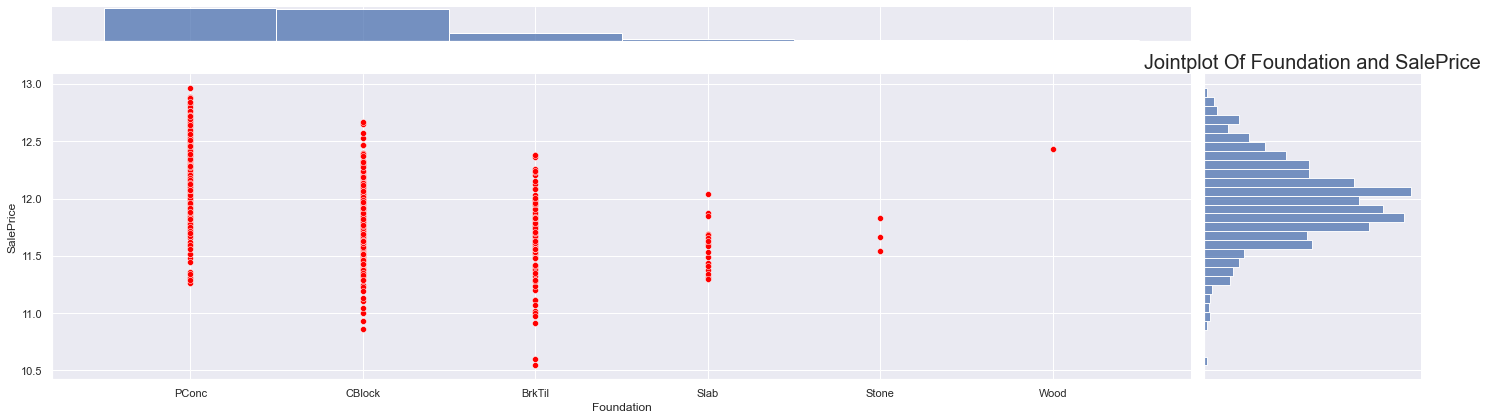

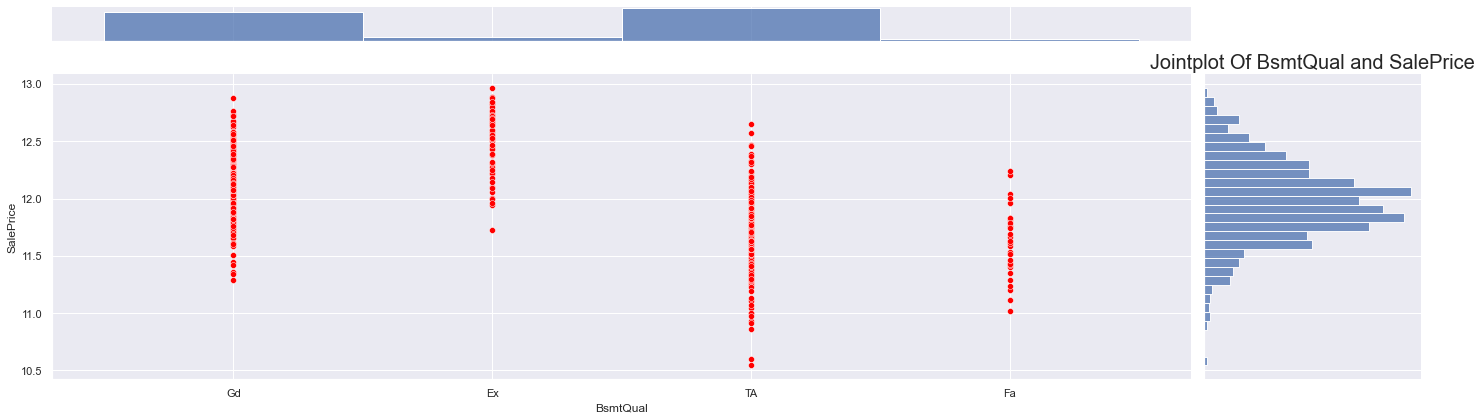

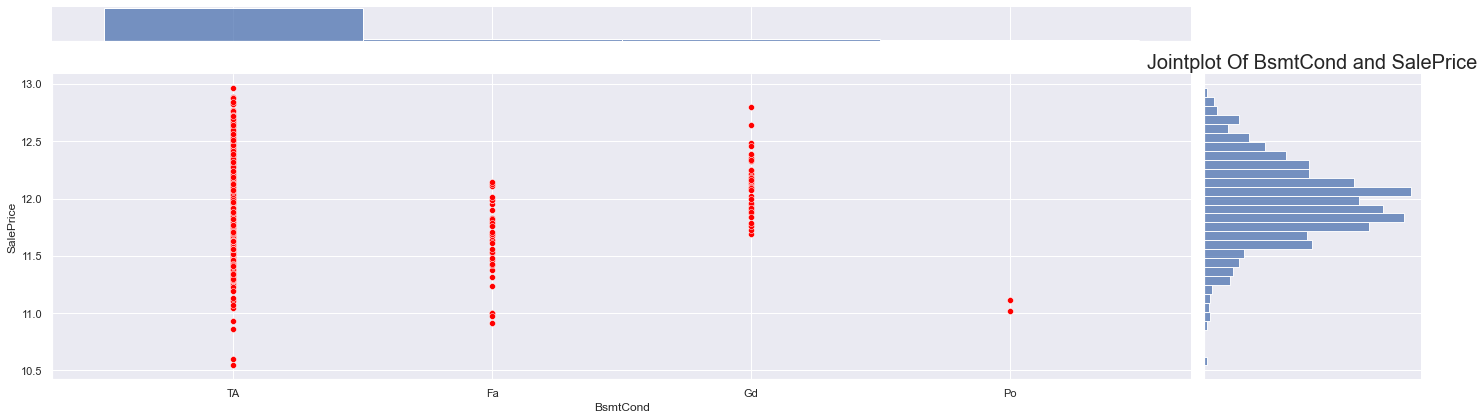

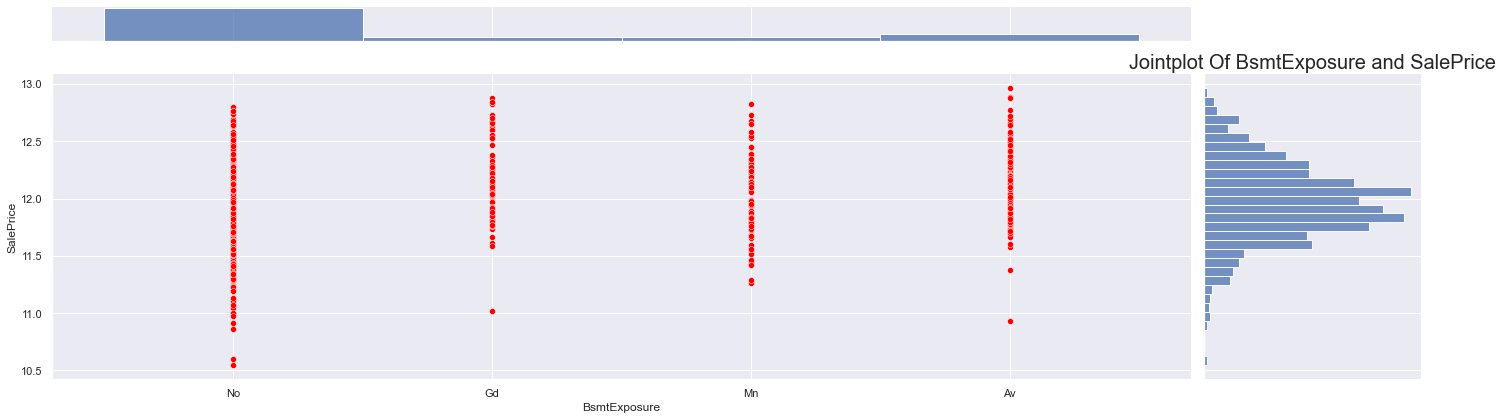

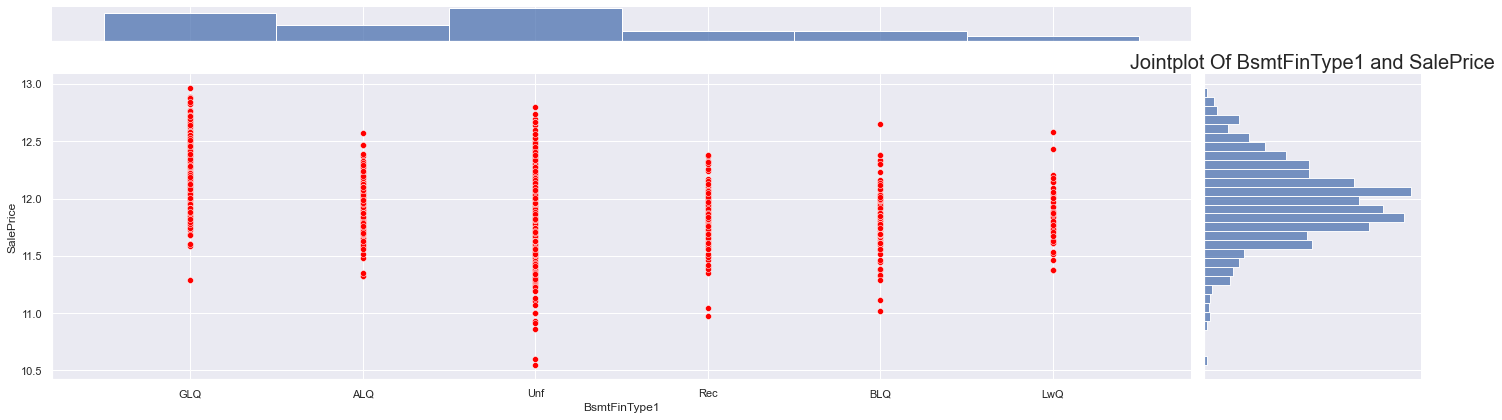

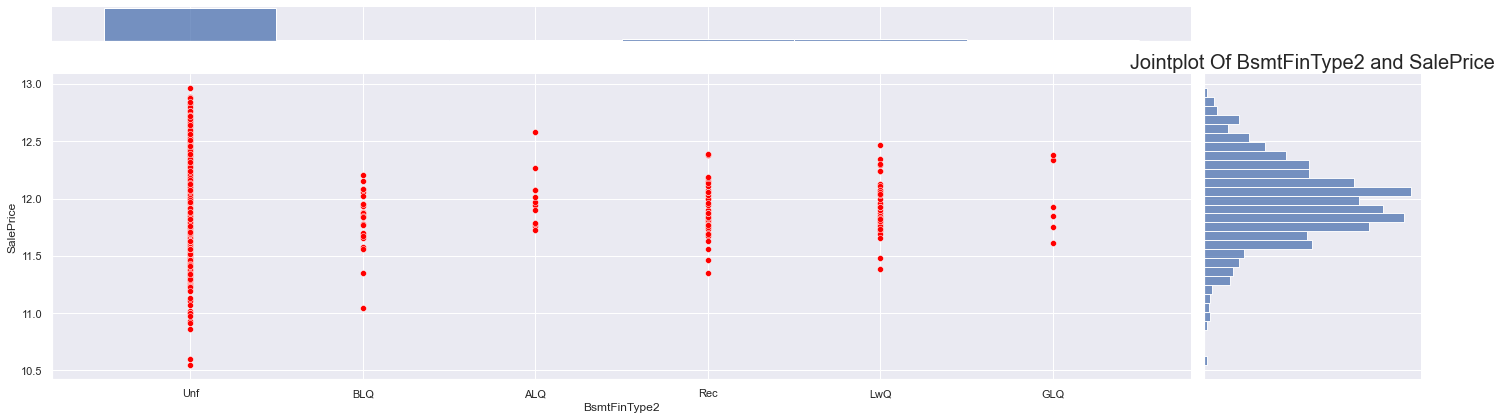

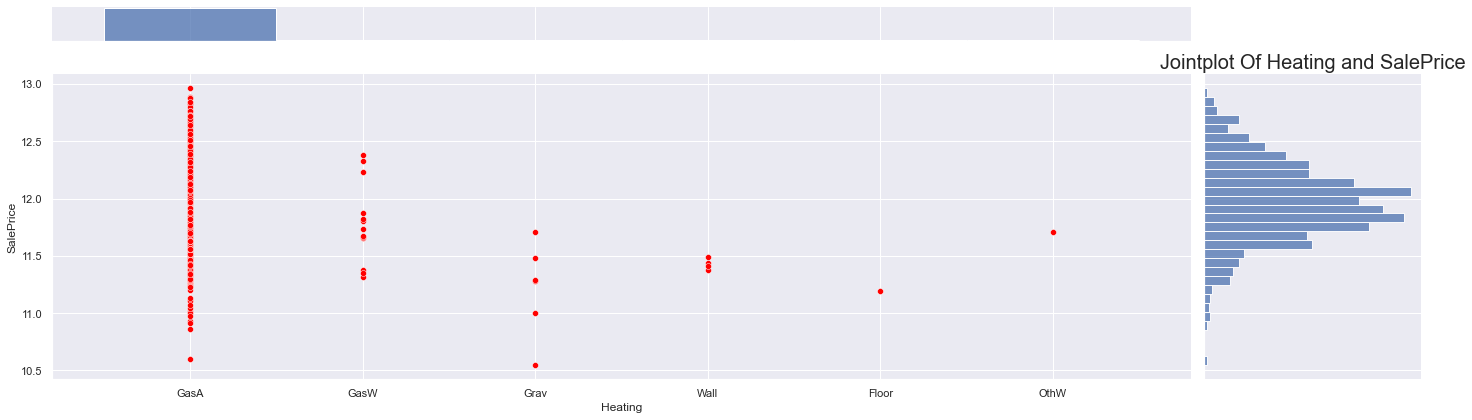

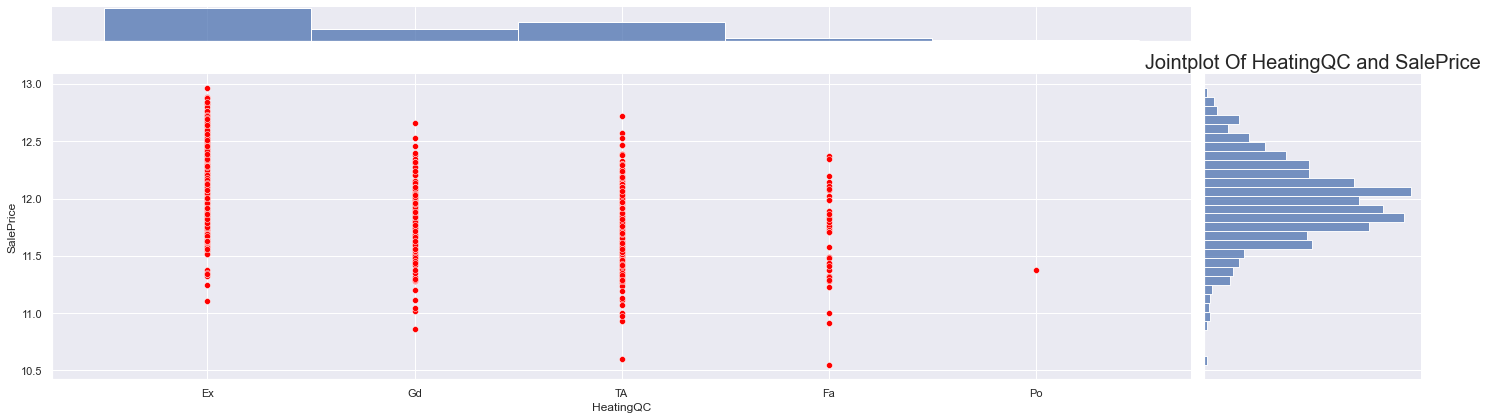

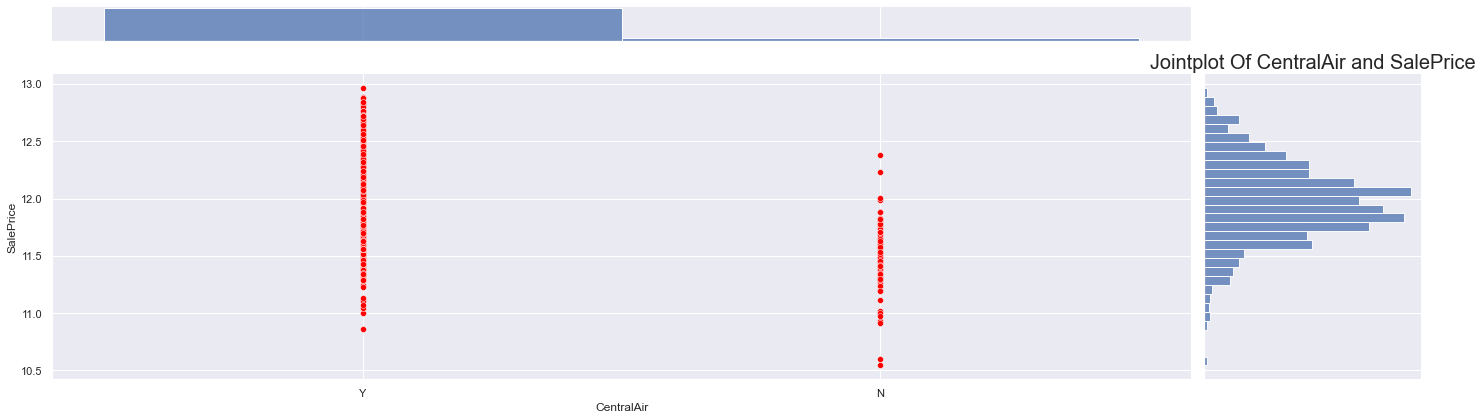

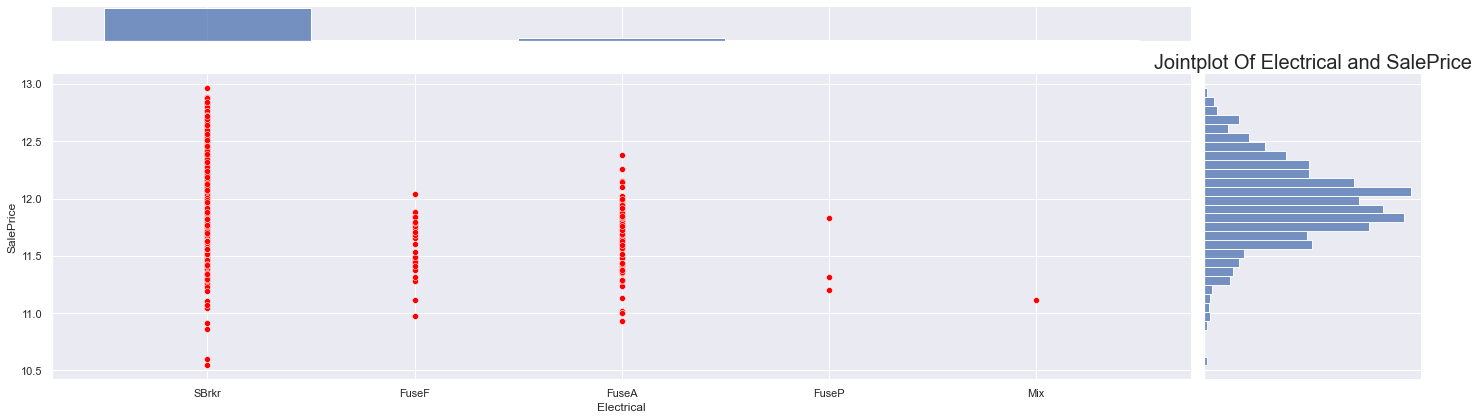

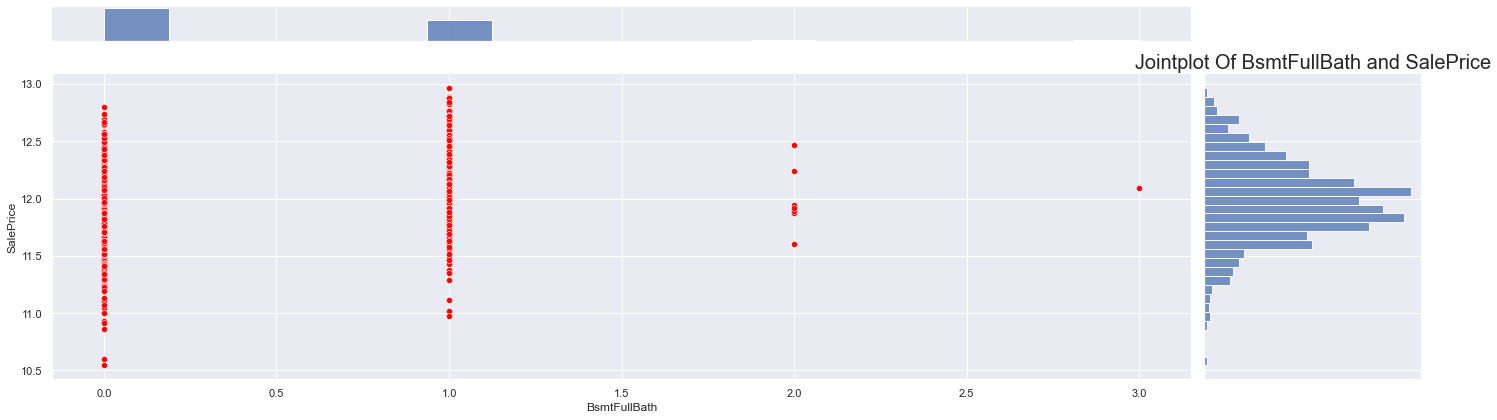

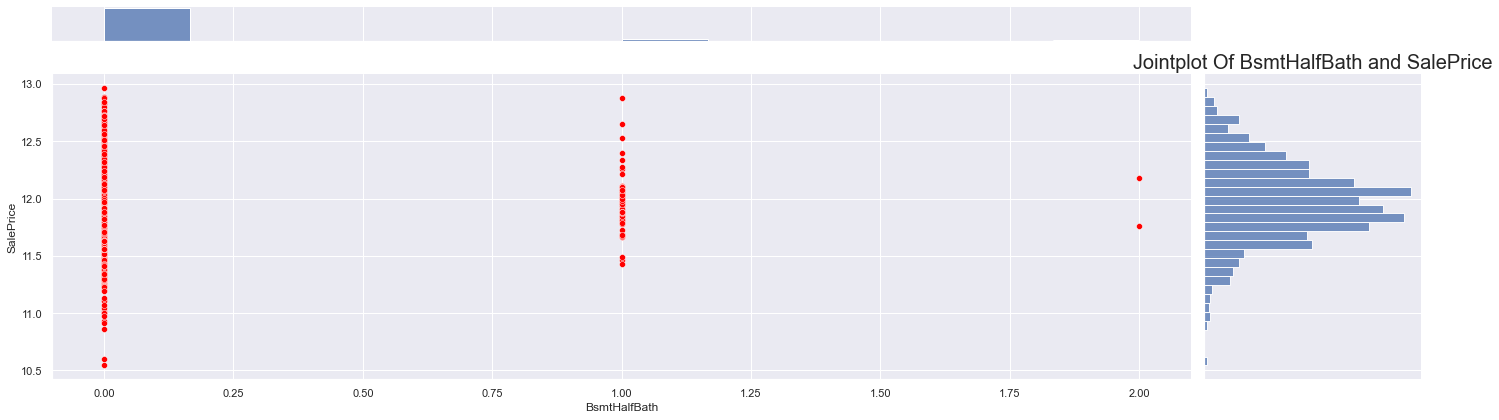

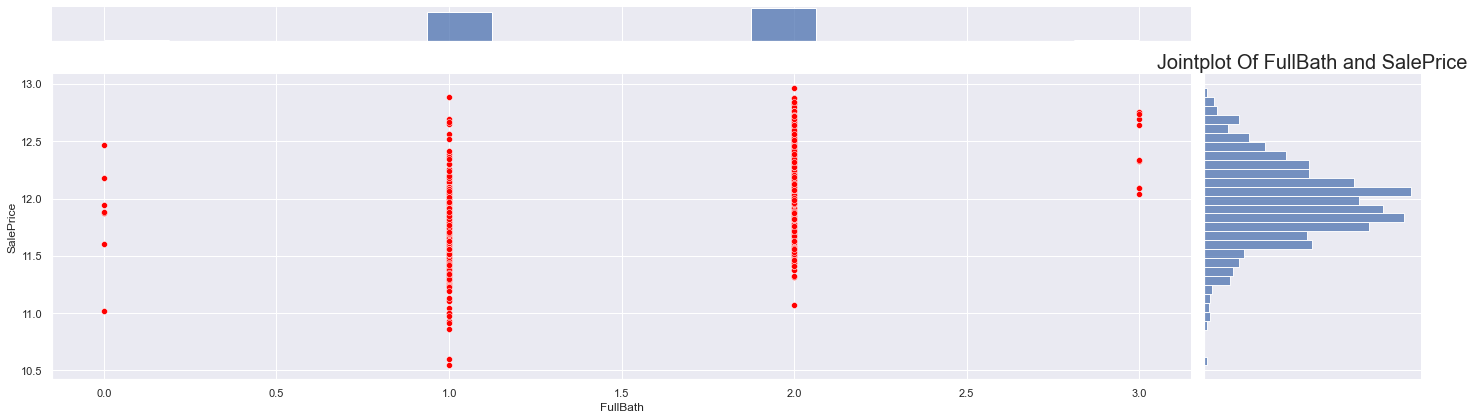

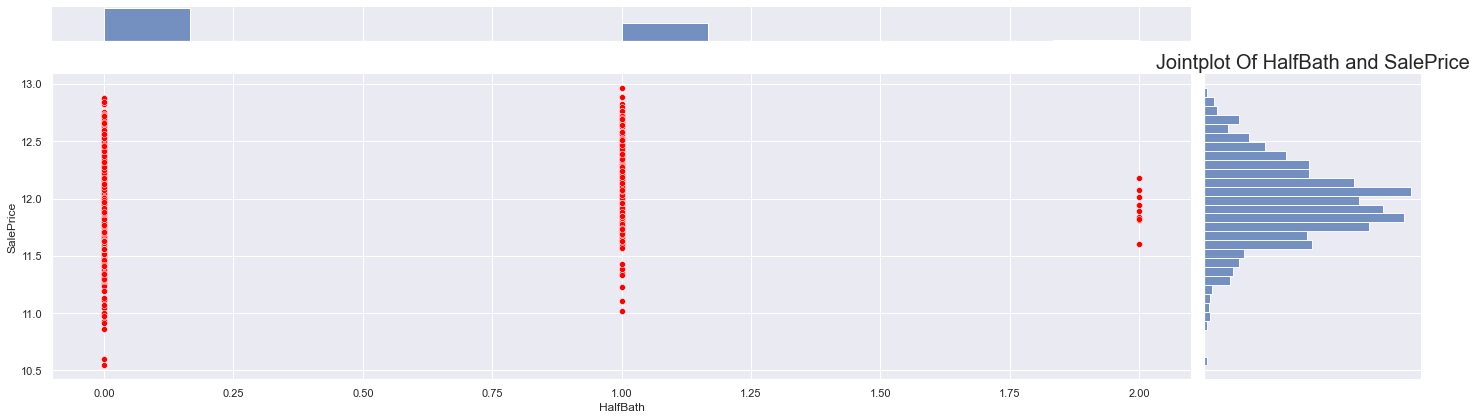

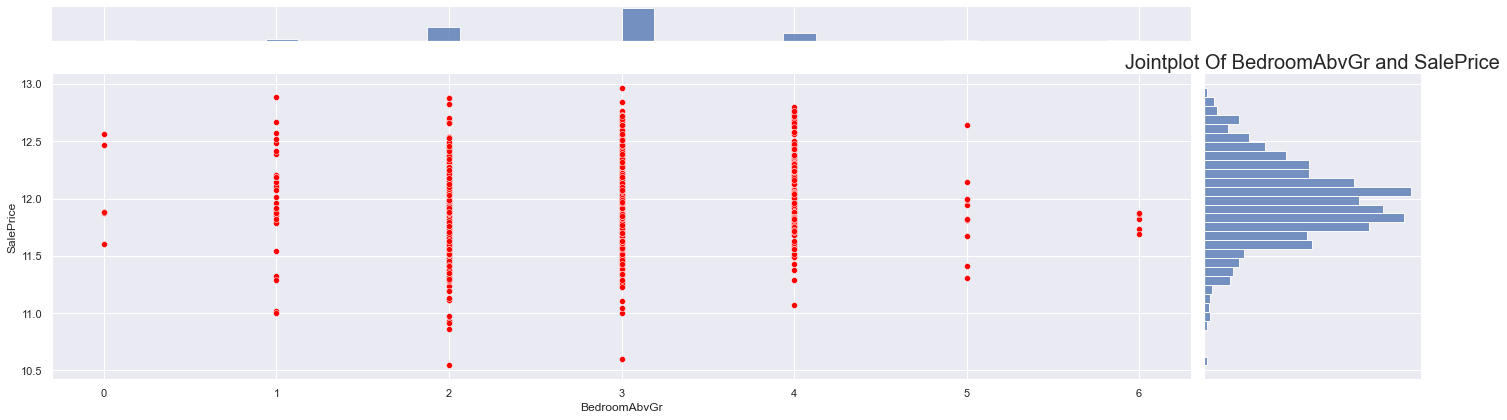

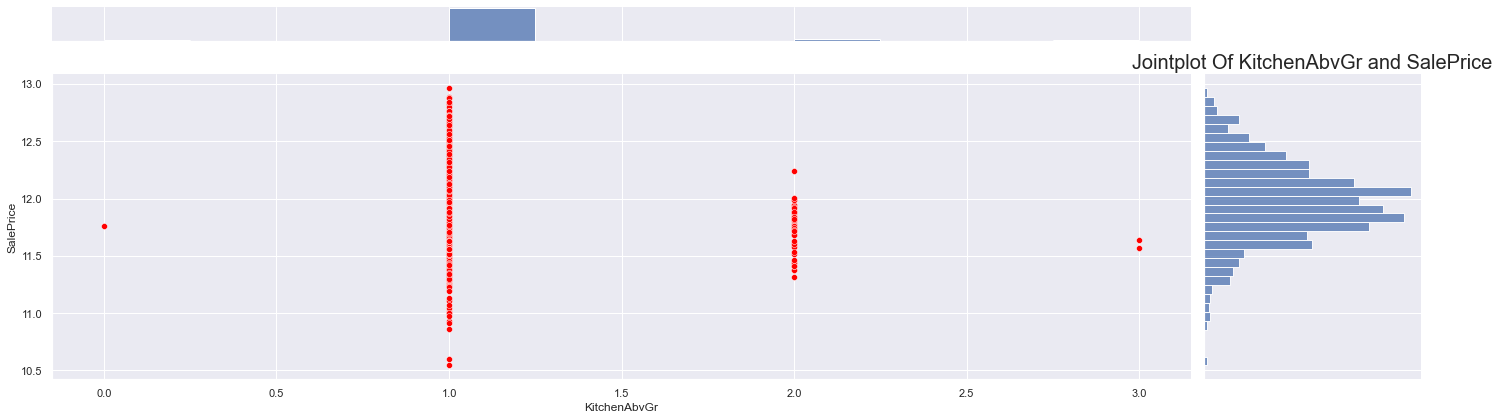

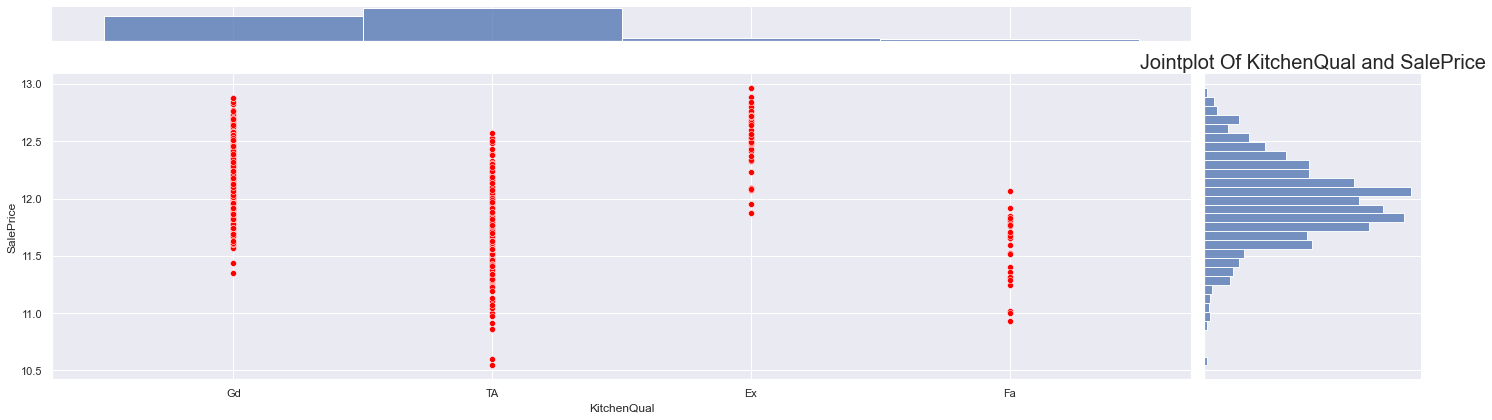

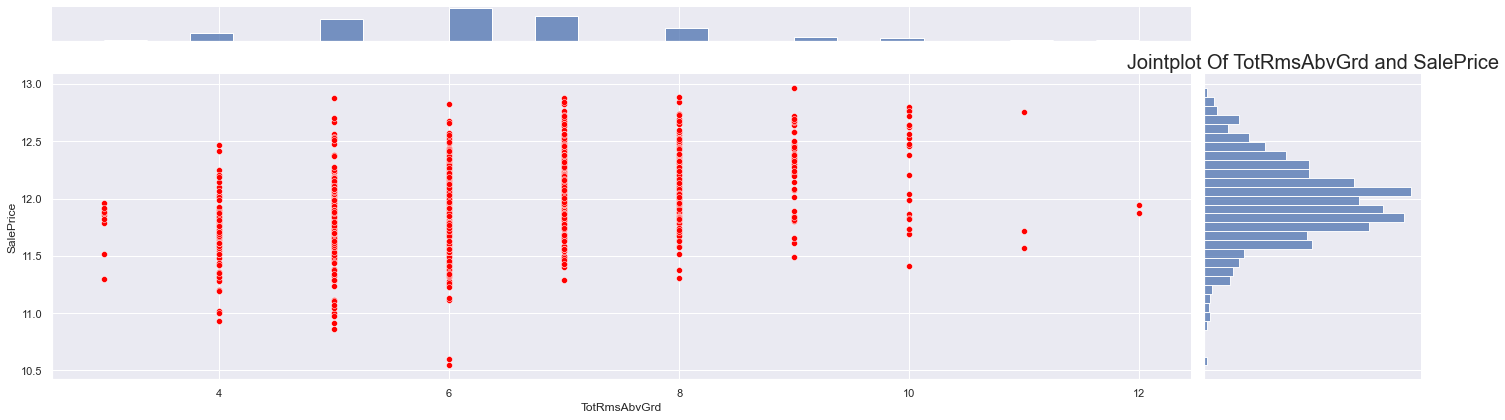

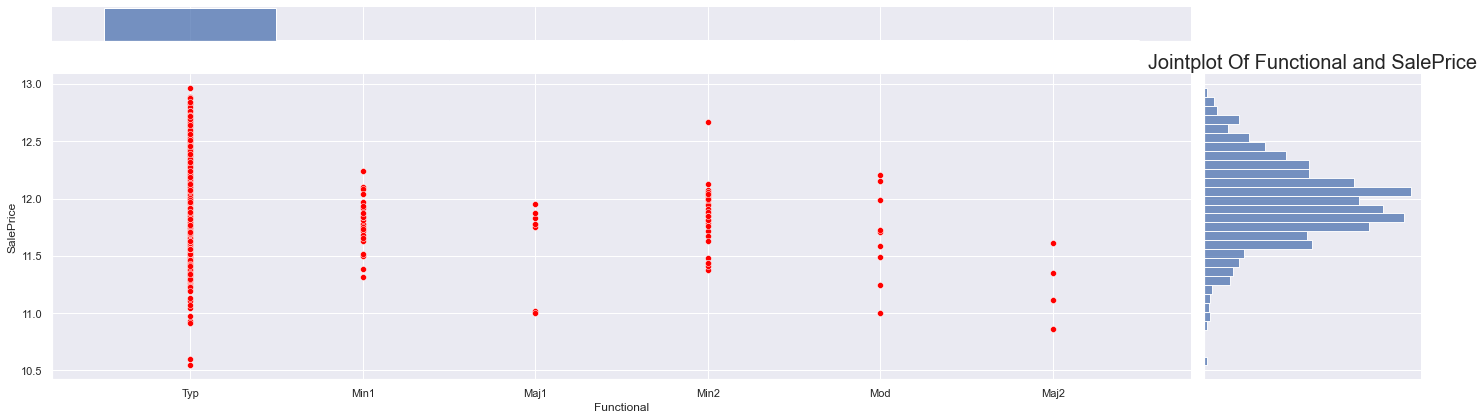

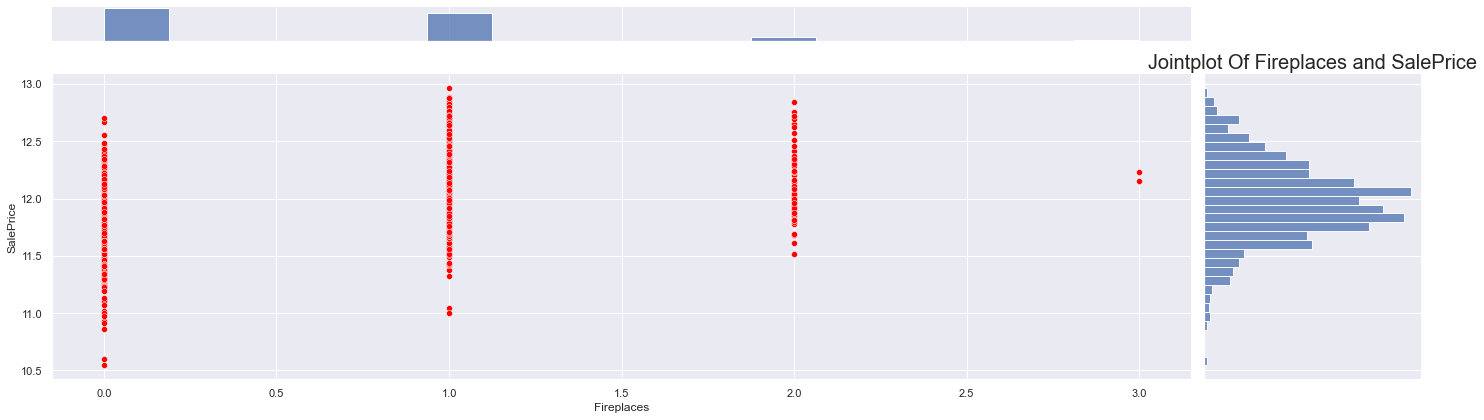

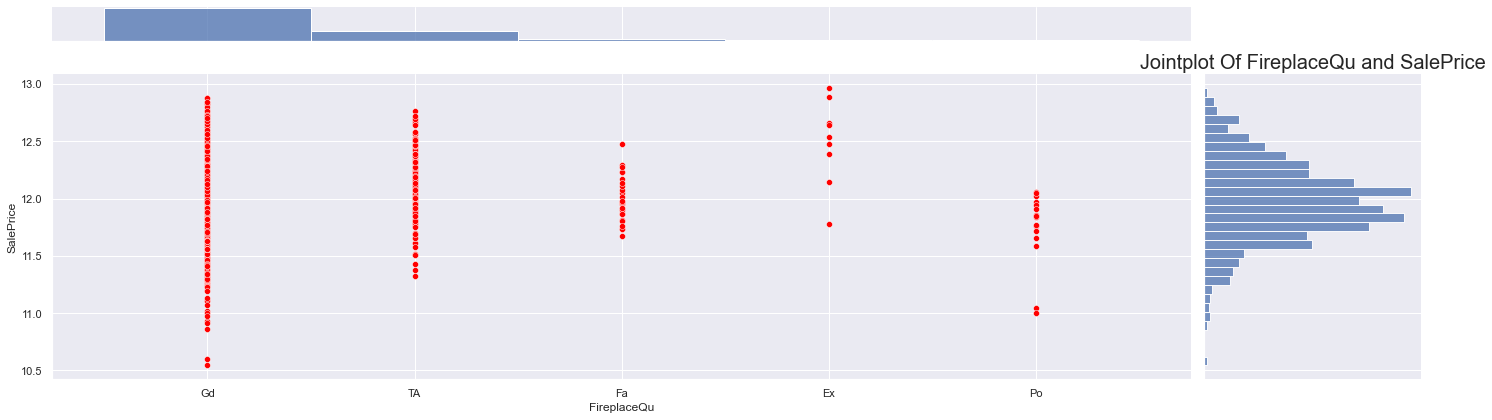

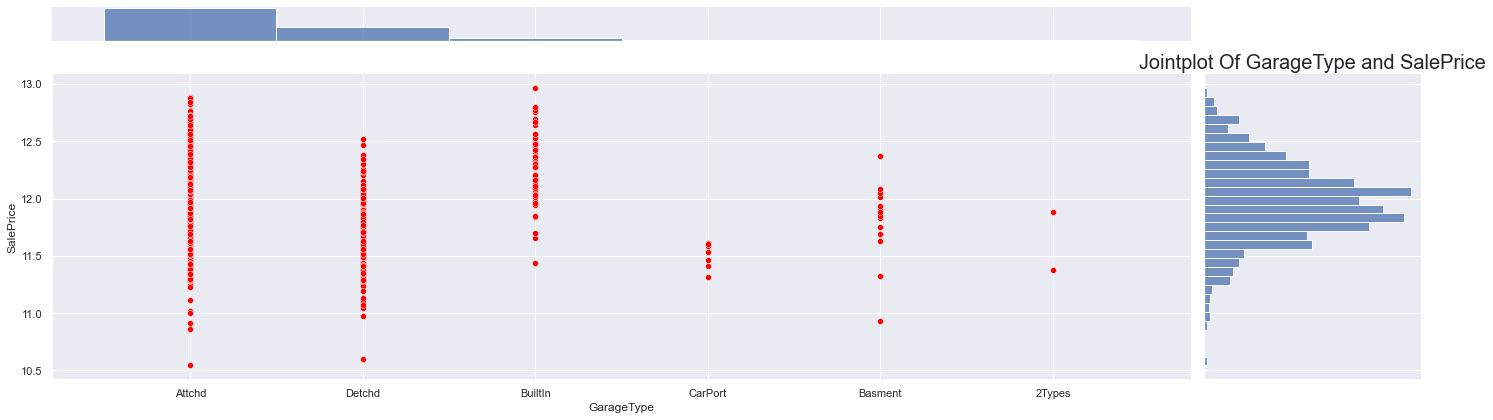

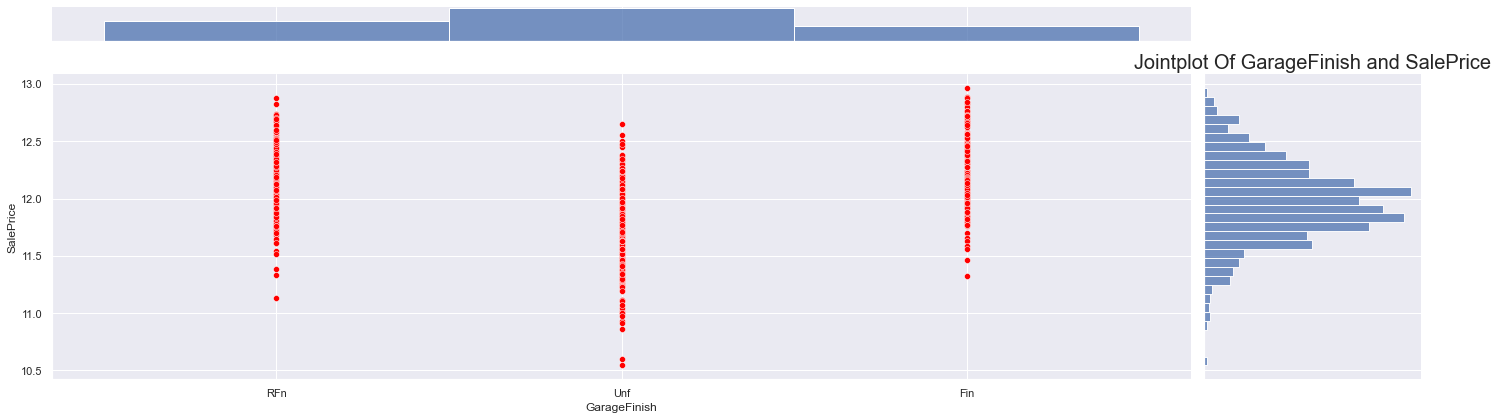

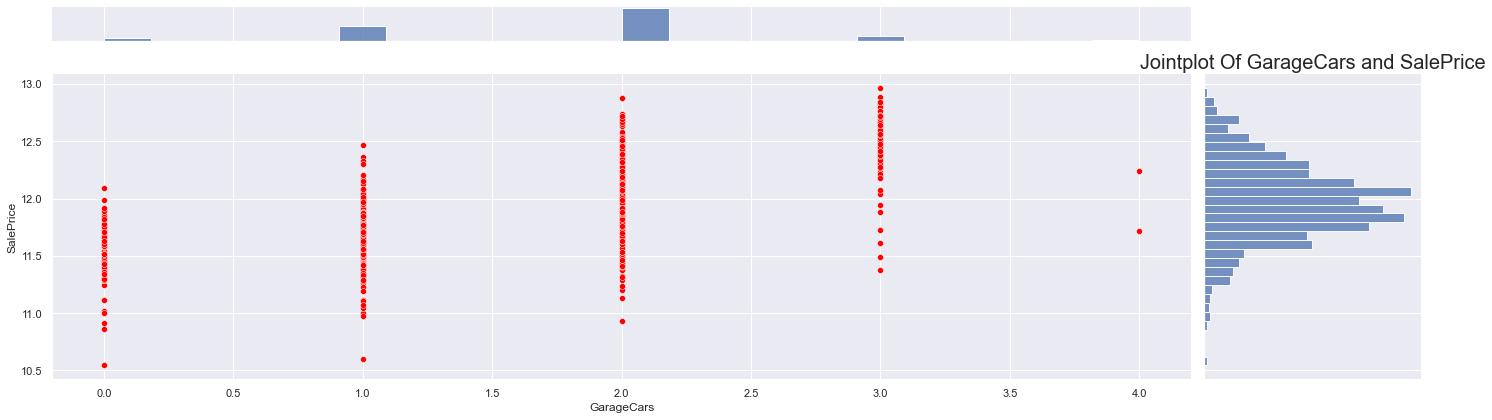

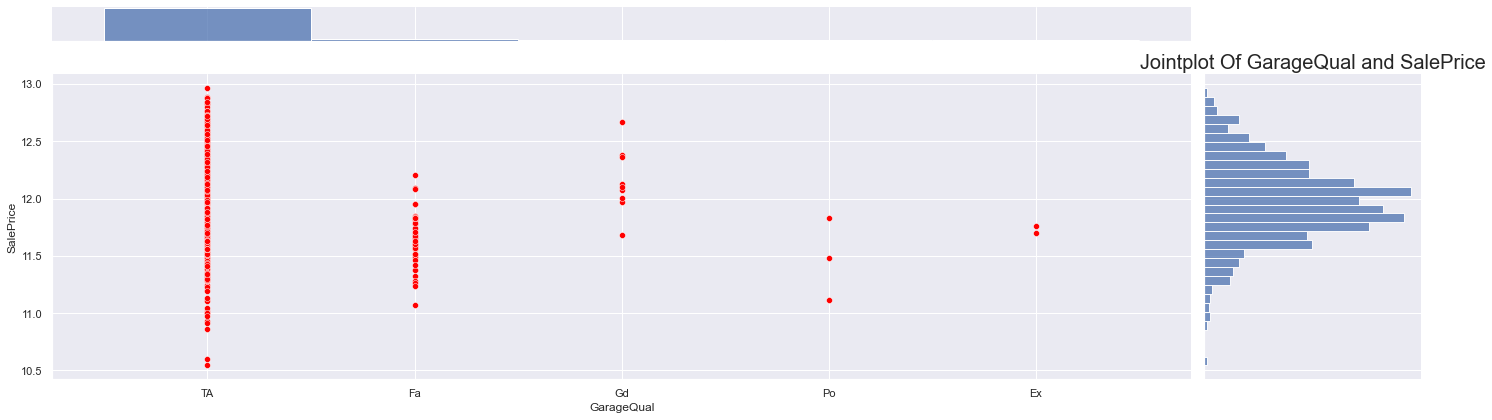

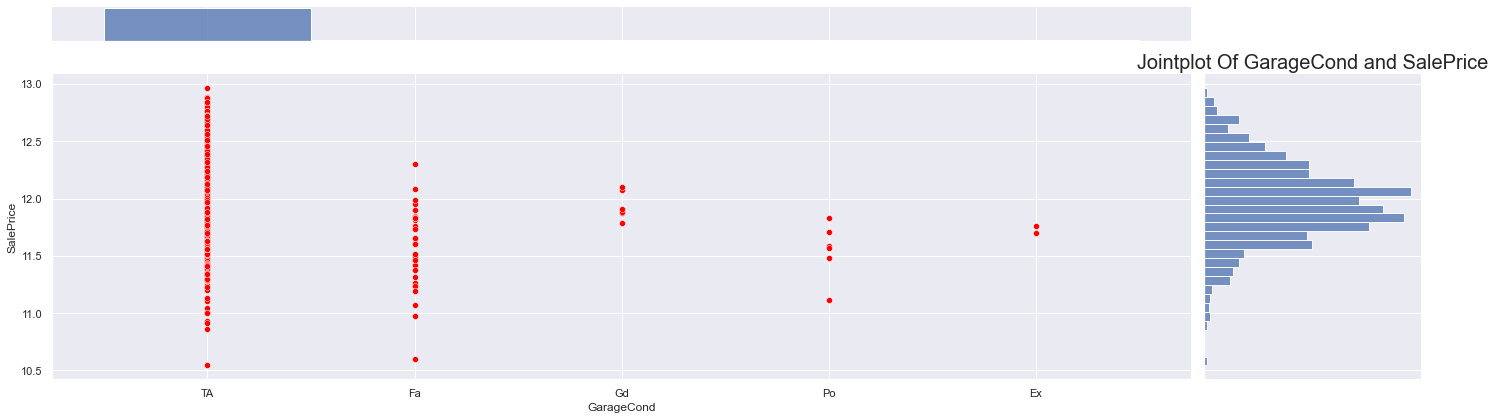

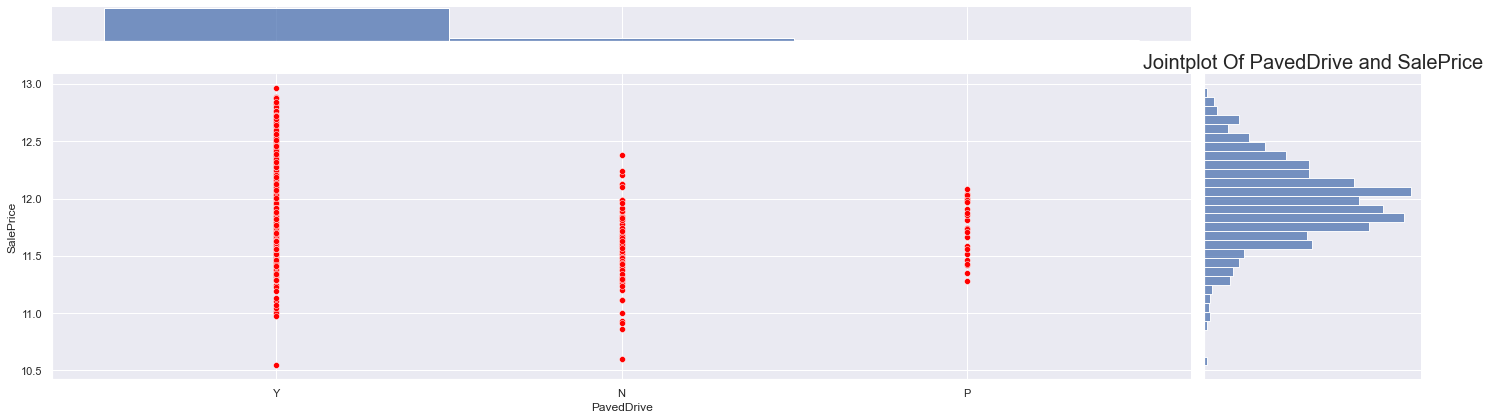

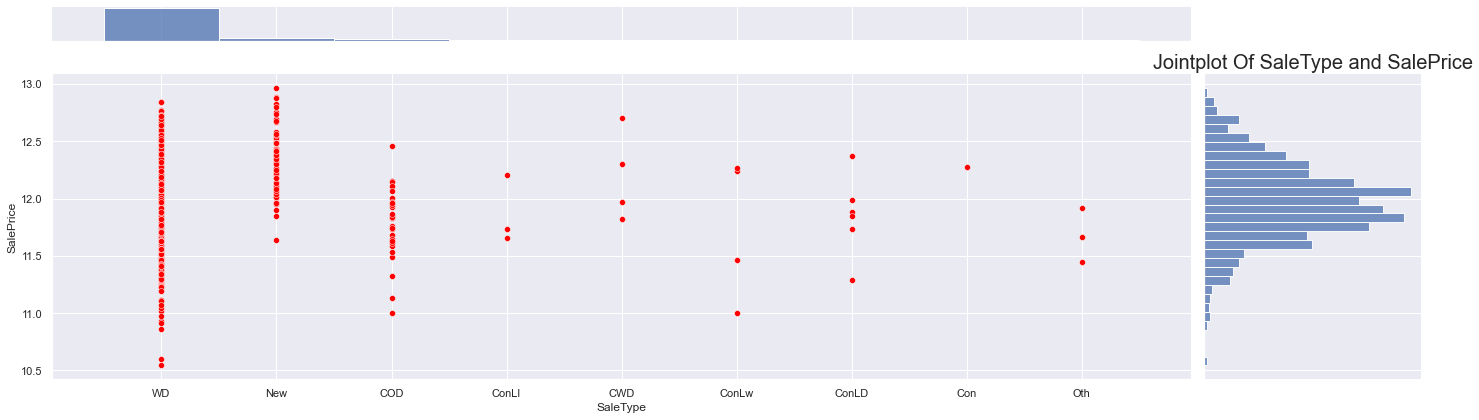

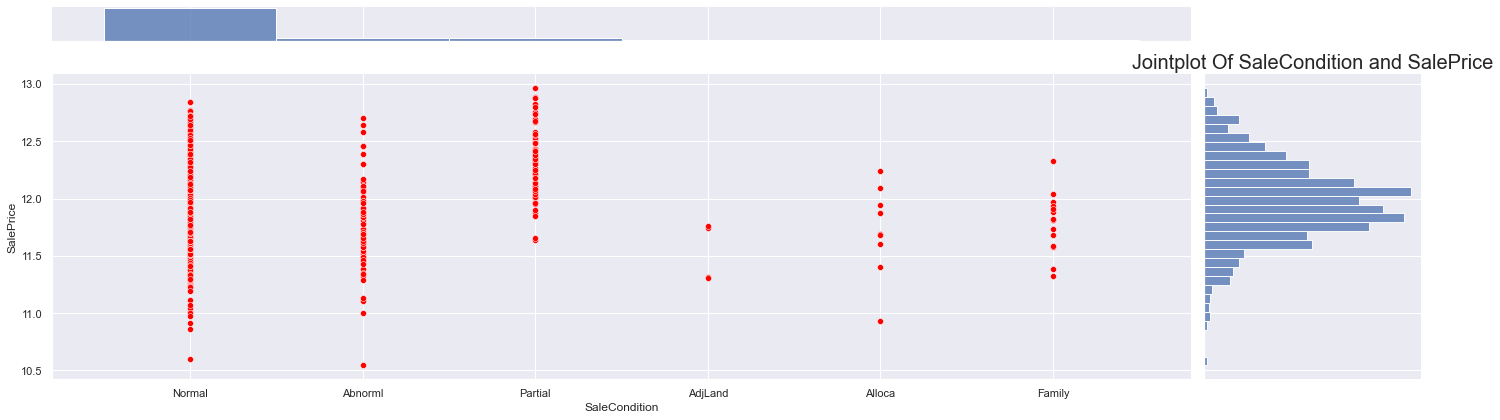

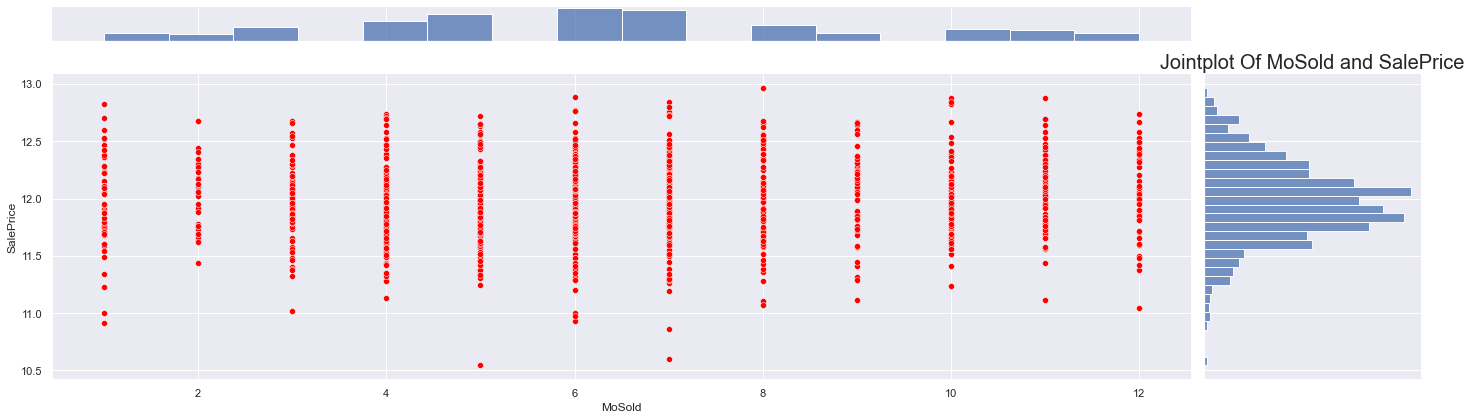

In [55]:
for col in df_Categorical_columns:
    sns.set(font_scale=1)
    plt.rcParams["figure.figsize"] = [7.50, 3.50]
    plt.rcParams["figure.autolayout"] = True

    ax=sns.jointplot(x=df_Categorical_columns[col],y=df_filtered_without_skewed_columns.SalePrice,joint_kws={'color': 'red'},palette='viridis')
    ax.fig.set_figwidth(20)
    ax.fig.set_figheight(6)
    #ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
    plt.title(f'Jointplot Of {col} and SalePrice', fontsize = 20)

    plt.tight_layout()
    plt.show()

-------------------
## **CORRELATION
--------------

### CORRELATION OF CONTINUOUS COLUMNS

In [56]:
df_filtered_without_skewed_columns[list_filtered_continuous_column + ['SalePrice']].corr().style.background_gradient(cmap='viridis')

From the above Correlation matrix, we have found relationships between
1. Target and Feature variables
2. Between Feature variables (high correlation between these will lead to problem of multicollinearity, and these type of columns could be dropped)

#### Target and Feature variables
There are only 1 column which are highly correlated with the target variable(SalePrice)

##### GrlivArea(0.66)-Positive Correlation

So, we keep this column for further training process because this is highly correlated with the target variable.

#### Between Feature variables (for continuous variables)

Independent variables having high correlation between them: 

1.GarageYrBlt and YearBuilt(0.73)-Positive Correlation

2.TotalBsmtSF and 1stFlrSF(0.75)-Positive Correlation

3.GrlivArea and 2ndFlrSF(0.72)-Positive Correlation

### CORRELATION OF CATEGORICAL COLUMNS

##### FUNCTION FOR DIVIDING CATEGORICAL COLUMNS INTO:
##### 1. COLUMNS HAVING 2 UNIQUE VALUES
##### 2. COLUMNS HAVING MORE THAN 2 UNIQUE VALUES

In [57]:
df_categorical_columns=df_filtered_without_skewed_columns[categorical_column_names]
categorical_columns_with_2values=[]
categorical_columns_morethan_2values=[]

def Categorical_columns_division():
    for col in df_categorical_columns:
        unique_vals=df_categorical_columns[col].unique()
        len_unique_vals=len(list(unique_vals))

        if len_unique_vals==2:
            categorical_columns_with_2values.append(col)
        else:
            categorical_columns_morethan_2values.append(col)


Categorical_columns_division()

print(categorical_columns_with_2values)
print(categorical_columns_morethan_2values)

['Street', 'Utilities', 'CentralAir']
['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition', 'MoSold']


### *Correlation between Feature variables (FOR CATEGORICAL COLUMNS USING CHISQUARE TEST)

In [58]:
df_Categorical_cols=df_filtered_without_skewed_columns[categorical_column_names]
df_Categorical_cols.shape

(1186, 52)

In [59]:
factors_paired = [(i,j) for i in df_Categorical_cols.columns.values for j in df_Categorical_cols.columns.values]
chi2, p_values =[], []
for f in factors_paired:
    if f[0]!=f[1]:
        chitest=chi2_contingency(pd.crosstab(df_Categorical_cols[f[0]],df_Categorical_cols[f[1]]))
        chi2.append(chitest[0])
        p_values.append(chitest[1])
    else:
        chi2.append(0)
        p_values.append(0)

p_values = np.array(p_values).reshape((52,52))
df_p_values = pd.DataFrame(p_values, index=df_Categorical_cols.columns.values, columns=df_Categorical_cols.columns.values)

# print(df_p_values)
 #print(p_values)
    
correlation_between_columns = df_p_values.apply(lambda x: x < 0.05, axis=1) #this will return the true values for correlated columns.
#if p_value>0.05- accept NULL hypothesis
#if  p_value<0.05-reject NULL hypothesis and accept ALTERNATE hypothesis
# p_value more closer to Zero then two variables are more correlated.
#NULL hypothesis- columns are not correlated.

#### This code is returning the series of true and False. True for the correlated columns and False for the independent columns.

In [60]:
pd.set_option("display.max_columns", None)
correlation_between_columns

MSSubClass  MSZoning  Street  LotShape  LandContour  Utilities  \
MSSubClass           True      True    True      True         True      False   
MSZoning             True      True    True      True         True      False   
Street               True      True    True      True         True       True   
LotShape             True      True    True      True         True      False   
LandContour          True      True    True      True         True      False   
Utilities           False     False    True     False        False       True   
LotConfig            True      True   False      True        False       True   
LandSlope            True      True    True     False         True      False   
Neighborhood         True      True    True      True         True       True   
Condition1           True     False    True      True        False      False   
Condition2           True     False   False     False         True      False   
BldgType             True      True    True      True         True      False   
HouseStyle           True      True    True      True         True       True   
OverallQual          True      True   False      True         True      False   
OverallCond          True      True   False      True         True      False   
RoofStyle            True      True   False     False         True      False   
RoofMatl             True     False   False     False         True      False   
Exterior1st          True      True   False      True         True      False   
Exterior2nd          True      True   False      True         True      False   
MasVnrType           True      True   False      True         True      False   
ExterQual            True      True    True      True         True      False   
ExterCond            True      True   False     False        False      False   
Foundation           True      True   False      True         True      False   
BsmtQual             True      True   False      True         True      False   
BsmtCond             True      True   False     False         True      False   
BsmtExposure         True      True    True      True         True      False   
BsmtFinType1         True      True   False      True         True      False   
BsmtFinType2        False     False    True      True        False       True   
Heating              True     False   False     False        False      False   
HeatingQC            True      True   False      True        False      False   
CentralAir           True      True    True      True         True      False   
Electrical           True      True   False      True        False       True   
BsmtFullBath         True      True   False     False         True      False   
BsmtHalfBath        False     False   False     False        False       True   
FullBath             True      True   False      True         True      False   
HalfBath             True      True   False      True        False      False   
BedroomAbvGr         True      True   False      True         True      False   
KitchenAbvGr         True      True   False     False        False      False   
KitchenQual          True      True    True      True         True      False   
TotRmsAbvGrd         True      True   False     False        False      False   
Functional           True     False   False     False        False      False   
Fireplaces           True      True   False      True        False      False   
FireplaceQu          True      True   False      True        False      False   
GarageType           True      True    True      True         True       True   
GarageFinish         True      True   False      True         True      False   
GarageCars           True      True   False      True         True      False   
GarageQual           True      True   False     False        False      False   
GarageCond           True      True   False     False        False      False   
PavedDrive           True      True   False   

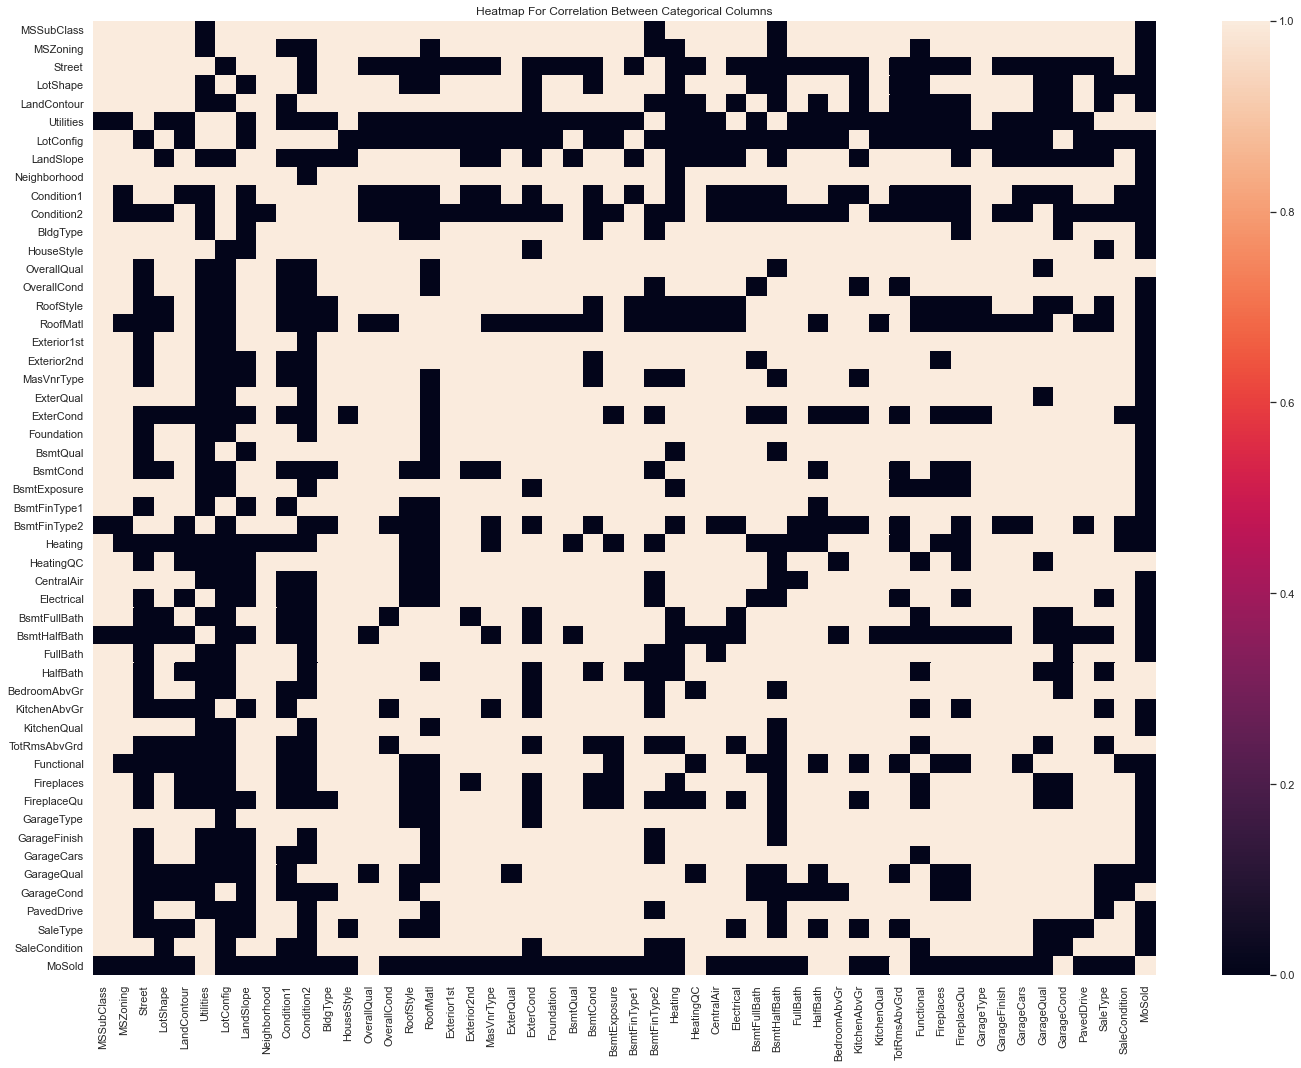

In [61]:
plt.figure(figsize=(20,15))
sns.heatmap(correlation_between_columns)
plt.title('Heatmap For Correlation Between Categorical Columns')
plt.show()

#### In the above fig Black are representing False(not correlated) values and White representing True(correlated) values.

-------------------------

### Code to find highly correlated columns from the above function(to get more precise value)

In [62]:
# Setting the value of significance level much closer to the ZERO to get more/highly correlated columns.
highly_correlated_columns = df_p_values.apply(lambda x: x < 0.00000000000000000000000001, axis=1)

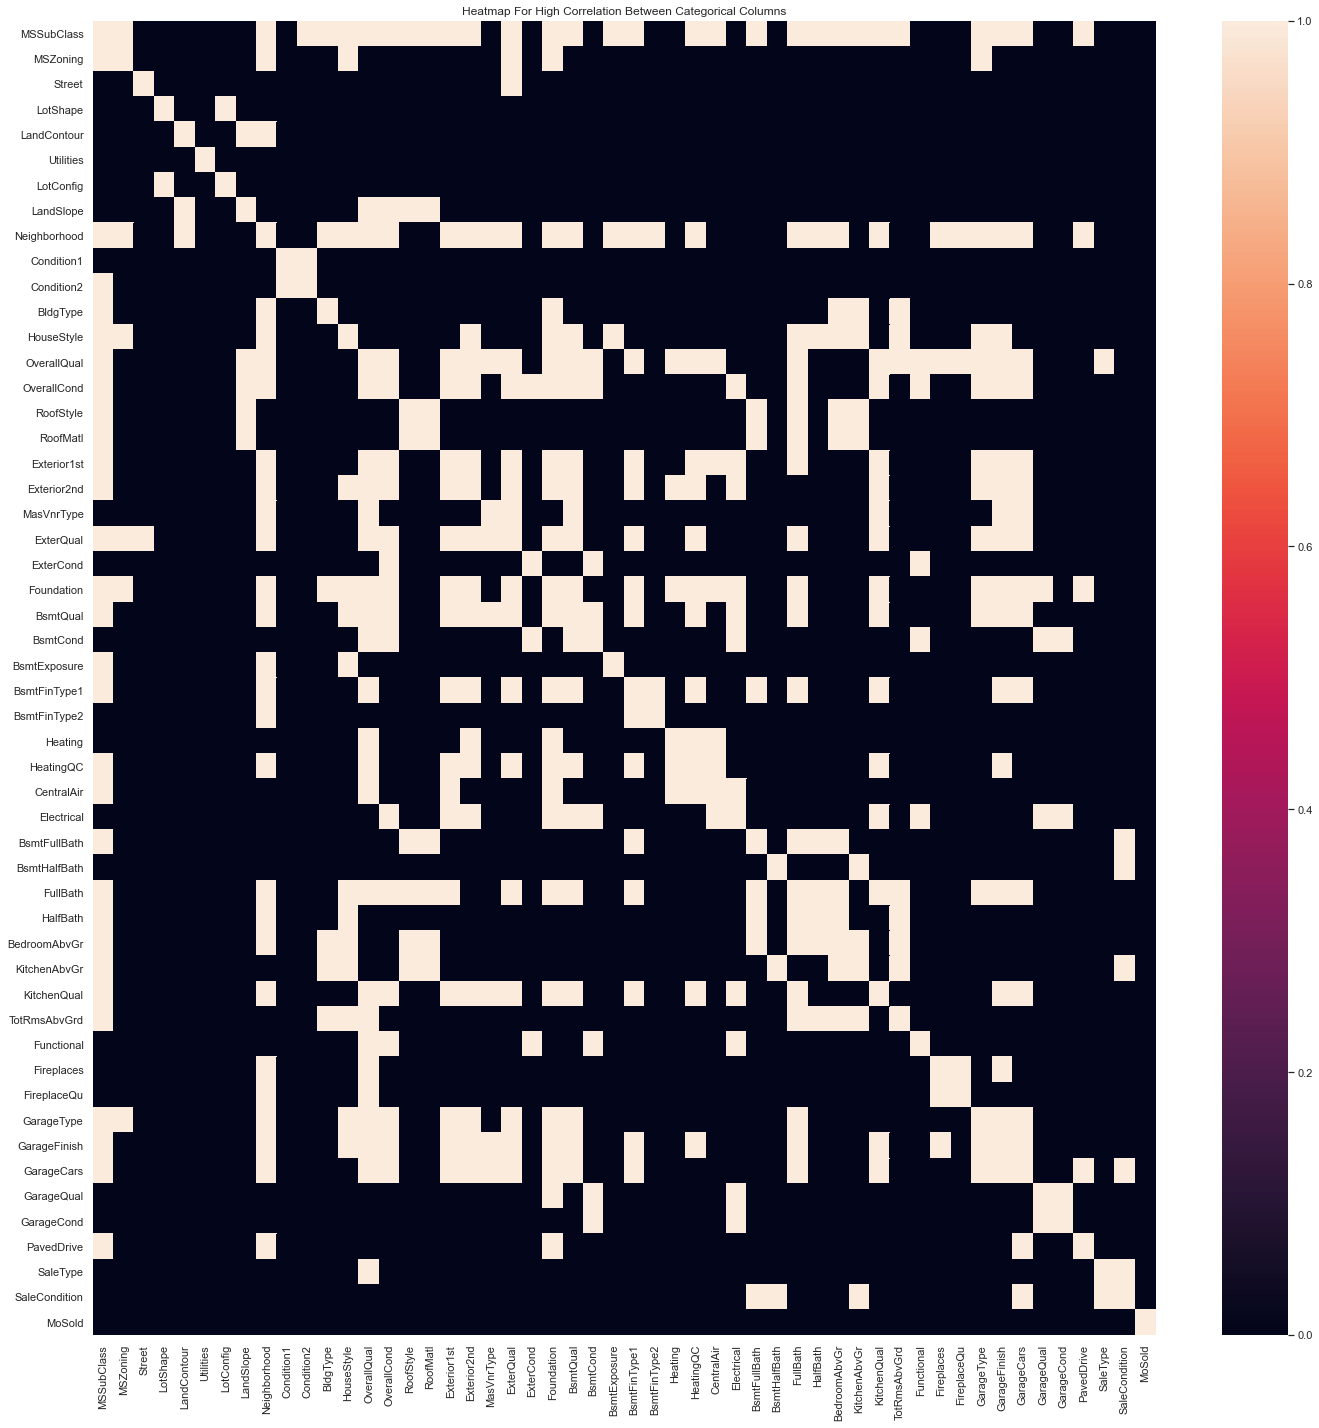

In [63]:
plt.figure(figsize=(20,20))
sns.heatmap(highly_correlated_columns)
plt.title('Heatmap For High Correlation Between Categorical Columns')
plt.show()

#### In the above fig Black are representing False(not correlated) values and White representing True(correlated) values.

### *Correlation Between Feature(categorical having only 2 unique values) variable and Target(Continuous) variable using Point Biserial Correlation

#### There are only 3 columns in Feature columns having this type of relationship with the Target variable:
#### 1. CentralAir
#### 2. Street
#### 3. Utilities

#### Intially using labelencoder for encoding the categorical values into numerical ones.

In [64]:
df_point_biserial=df_filtered_without_skewed_columns[categorical_columns_with_2values+['SalePrice']]

In [65]:

from sklearn import preprocessing
encoder=preprocessing.LabelEncoder()
for i in df_point_biserial.columns:
    if isinstance(df_point_biserial[i][0],str):  #df_point_biserial[i][0] representing 1st value of the column
        df_point_biserial[i]=encoder.fit_transform(df_point_biserial[i])  #df_point_biserial[i]-representing whole column
df_point_biserial.head()       

Street  Utilities  CentralAir  SalePrice
0       1          0           1   12.24769
1       1          0           1   12.10901
2       1          0           1   12.31717
4       1          0           1   12.42922
6       1          0           1   12.63460

In [66]:
encoded_categorical_target_2values=df_point_biserial
encoded_categorical_target_2values.corr()

Street  Utilities  CentralAir  SalePrice
Street     1.00000    0.00146     0.12679    0.08434
Utilities  0.00146    1.00000     0.00744   -0.01241
CentralAir 0.12679    0.00744     1.00000    0.36120
SalePrice  0.08434   -0.01241     0.36120    1.00000

#### Above mentioned columns don't have a good correlation with the Target varible.


-----------------------------

### *Correlation Between Feature(categorical having more than 2 unique values) variable and Target(Continuous) variable using One Way Annova

#### FOR ANNOVA
#### Greater the F score more the columns are correlated
#### F score closer to ZERO will have no correlation
#### p-value and F score are inversely related to each other

In [67]:
df_CategoricalColsMoreThanTwoUniqueVals=df_filtered_without_skewed_columns[categorical_columns_morethan_2values]
#df_CategoricalColsMoreThanTwoUniqueVals

In [68]:
from scipy import stats


def anova_oneway(col):
    unique_vals = col.unique()
    col_saleprice_per_category = []
    for val in unique_vals:
        col_saleprice_per_category.append(df_filtered_without_skewed_columns[col==val].SalePrice)

    return stats.f_oneway(*col_saleprice_per_category)
    

df_anova = df_CategoricalColsMoreThanTwoUniqueVals.apply(anova_oneway, axis=0)
df_anova=df_anova.rename(index = {0: 'f_score', 1: 'p_value'})
df_anova

MSSubClass  MSZoning  LotShape  LandContour  LotConfig  LandSlope  \
f_score    46.77398  59.97865  30.96984     10.71325    4.06838    0.90292   
p_value     0.00000   0.00000   0.00000      0.00000    0.00279    0.40566   

         Neighborhood  Condition1  Condition2  BldgType  HouseStyle  \
f_score      59.90943     7.92471     1.76732  10.92352    28.44077   
p_value       0.00000     0.00000     0.13305   0.00000     0.00000   

         OverallQual  OverallCond  RoofStyle  RoofMatl  Exterior1st  \
f_score    231.32208     32.57386    2.43543   0.77246     26.33635   
p_value      0.00000      0.00000    0.03305   0.56961      0.00000   

         Exterior2nd  MasVnrType  ExterQual  ExterCond  Foundation  BsmtQual  \
f_score     20.76405    95.53861  297.96472   14.66708   127.86304 317.76970   
p_value      0.00000     0.00000    0.00000    0.00000     0.00000   0.00000   

         BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2  Heating  \
f_score  20.64110      31.67232      66.24503       1.92428 10.69566   
p_value   0.00000       0.00000       0.00000       0.08757  0.00000   

         HeatingQC  Electrical  BsmtFullBath  BsmtHalfBath  FullBath  \
f_score   98.44076    32.05540      23.50205       0.01102 197.83840   
p_value    0.00000     0.00000       0.00000       0.98904   0.00000   

         HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
f_score  76.97384      12.99808      11.71632    287.66433      37.04211   
p_value   0.00000       0.00000       0.00000      0.00000       0.00000   

         Functional  Fireplaces  FireplaceQu  GarageType  GarageFinish  \
f_score    10.24931   103.50407     26.81603    63.94246     332.54994   
p_value     0.00000     0.00000      0.00000     0.00000       0.00000   

         GarageCars  GarageQual  GarageCond  PavedDrive  SaleType  \
f_score   220.25813    13.69868    14.75958    59.96411  14.69889   
p_value     0.00000     0.00000     0.00000     0.00000   0.00000   

         SaleCondition  MoSold  
f_score       28.22312 1.13853  
p_value        0.00000 0.32689

In [69]:
#sorting of series to figure out the highest f_value.
df_anova.iloc[0].sort_values()

BsmtHalfBath      0.01102
RoofMatl          0.77246
LandSlope         0.90292
MoSold            1.13853
Condition2        1.76732
BsmtFinType2      1.92428
RoofStyle         2.43543
LotConfig         4.06838
Condition1        7.92471
Functional       10.24931
Heating          10.69566
LandContour      10.71325
BldgType         10.92352
KitchenAbvGr     11.71632
BedroomAbvGr     12.99808
GarageQual       13.69868
ExterCond        14.66708
SaleType         14.69889
GarageCond       14.75958
BsmtCond         20.64110
Exterior2nd      20.76405
BsmtFullBath     23.50205
Exterior1st      26.33635
FireplaceQu      26.81603
SaleCondition    28.22312
HouseStyle       28.44077
LotShape         30.96984
BsmtExposure     31.67232
Electrical       32.05540
OverallCond      32.57386
TotRmsAbvGrd     37.04211
MSSubClass       46.77398
Neighborhood     59.90943
PavedDrive       59.96411
MSZoning         59.97865
GarageType       63.94246
BsmtFinType1     66.24503
HalfBath         76.97384
MasVnrType  

## LABEL ENCODING OF FILTERED DATAFRAME

In [70]:
df_filtered_labelencode=df_filtered_without_skewed_columns
from sklearn import preprocessing
encoder=preprocessing.LabelEncoder()
for i in df_filtered_labelencode.columns:
    if isinstance(df_filtered_labelencode[i][0],str):  #df_point_biserial[i][0] representing 1st value of the column
        df_filtered_labelencode[i]=encoder.fit_transform(df_filtered_labelencode[i])  #df_point_biserial[i]-representing whole column
df_filtered_labelencode      

Id  MSSubClass  MSZoning  LotFrontage   LotArea  Street  LotShape  \
0        1          60         3     65.00000  91.92388       1         3   
1        2          20         3     80.00000  97.97959       1         3   
2        3          60         3     68.00000 106.06602       1         0   
4        5          60         3     84.00000 119.41524       1         0   
6        7          20         3     75.00000 100.41912       1         3   
...    ...         ...       ...          ...       ...     ...       ...   
1451  1452          20         3     78.00000  96.23929       1         3   
1452  1453         180         4     35.00000  60.62178       1         3   
1453  1454          20         3     90.00000 131.21357       1         3   
1454  1455          20         1     62.00000  86.60254       1         3   
1455  1456          60         3     62.00000  88.97753       1         3   

      LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0               3          0          4          0             5           2   
1               3          0          2          0            24           1   
2               3          0          4          0             5           2   
4               3          0          2          0            15           2   
6               3          0          4          0            21           2   
...           ...        ...        ...        ...           ...         ...   
1451            3          0          4          0            21           2   
1452            3          0          4          0             7           2   
1453            3          0          4          0            11           2   
1454            3          0          4          0            21           2   
1455            3          0          4          0             8           2   

      Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0              2         0           4            7            5       2003   
1              2         0           2            6            8       1976   
2              2         0           4            7            5       2001   
4              2         0           4            8            5       2000   
6              2         0           2            8            5       2004   
...          ...       ...         ...          ...          ...        ...   
1451           2         0           2            8            5       2008   
1452           2         4           6            5            5       2005   
1453           2         0           2            5            5       2006   
1454           2         0           2            7            5       2004   
1455           2         0           4            6            5       1999   

      YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0             2003          1         0           11           13           1   
1             1976          1         0            8            8           2   
2             2002          1         0           11           13           1   
4             2000          1         0           11           13           1   
6             2005          1         0           11           13           3   
...            ...        ...       ...          ...          ...         ...   
1451          2009          1         0            5            5           3   
1452          2005          1         0           11           13           1   
1453          2006          1         0           11           13           2   
1454          2005          1         0           11           13           2   
1455          2000          1         0           11           13           2   

      MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0       14.00000          2          4           2         2         3   
1        0.00000          3          4           1  

In [71]:
filtered_test_cols = list(df_filtered_without_skewed_columns.columns)
filtered_test_cols.remove('SalePrice')
df_filtered_test_labelencode=df_filtered_test[filtered_test_cols]
from sklearn import preprocessing
encoder=preprocessing.LabelEncoder()
for i in df_filtered_test_labelencode.columns:
    if isinstance(df_filtered_test_labelencode[i][0],str):  #df_point_biserial[i][0] representing 1st value of the column
        df_filtered_test_labelencode[i]=encoder.fit_transform(df_filtered_test_labelencode[i])  #df_point_biserial[i]-representing whole column
df_filtered_test_labelencode 

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0     1461          20         2     80.00000    11622       1         3   
2     1463          60         3     74.00000    13830       1         0   
3     1464          60         3     78.00000     9978       1         0   
4     1465         120         3     43.00000     5005       1         0   
5     1466          60         3     75.00000    10000       1         0   
...    ...         ...       ...          ...      ...     ...       ...   
1451  2912          20         3     80.00000    13384       1         3   
1454  2915         160         4     21.00000     1936       1         3   
1455  2916         160         4     21.00000     1894       1         3   
1457  2918          85         3     62.00000    10441       1         3   
1458  2919          60         3     74.00000     9627       1         3   

      LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0               3          0          4          0            12           1   
2               3          0          4          0             8           2   
3               3          0          4          0             8           2   
4               1          0          4          0            22           2   
5               3          0          0          0             8           2   
...           ...        ...        ...        ...           ...         ...   
1451            3          0          4          1            11           2   
1454            3          0          4          0            10           2   
1455            3          0          4          0            10           2   
1457            3          0          4          0            11           2   
1458            3          0          4          1            11           2   

      Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0              2         0           2            5            6       1961   
2              2         0           4            5            5       1997   
3              2         0           4            6            6       1998   
4              2         4           2            8            5       1992   
5              2         0           4            6            5       1993   
...          ...       ...         ...          ...          ...        ...   
1451           2         0           2            5            5       1969   
1454           2         3           4            4            7       1970   
1455           2         4           4            4            5       1970   
1457           2         0           5            5            5       1992   
1458           2         0           4            7            5       1993   

      YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0             1961          1         0            9           12           2   
2             1998          1         0            9           12           2   
3             1998          1         0            9           12           1   
4             1992          1         0            5            6           2   
5             1994          1         0            5            6           2   
...            ...        ...       ...          ...          ...         ...   
1451          1979          1         0            7            9           1   
1454          1970          1         0            4            5           2   
1455          1970          1         0            4            5           2   
1457          1992          1         0            5           14           2   
1458          1994          1         0            5            6           1   

      MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0        0.00000          3          4           1         3         3   
2        0.00000          3          4           2         2    

In [72]:
#continuous_column_names[:-4]

## VIF(VARIANCE INFLATION FACTOR)

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df_filtered_labelencode[list(df_filtered_labelencode.columns[:-1])]
# X
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# for i in range(X.shape[1]):
#     variance_inflation_factor(X.values,i)
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)    
pd.set_option("display.max_rows", None)
print(vif_info)

# low_vif_columns=[]
low_vif_df = (vif_info[vif_info['VIF']<100])
low_vif_df

           VIF         Column
0      4.26752             Id
1     15.96107     MSSubClass
2     33.34171       MSZoning
3     31.65427    LotFrontage
4     61.13269        LotArea
5    456.25375         Street
6      3.96339       LotShape
7     23.39120    LandContour
8      1.11328      Utilities
9      5.30533      LotConfig
10     1.39119      LandSlope
11     6.68002   Neighborhood
12     7.54877     Condition1
13   323.59387     Condition2
14     6.11319       BldgType
15     9.02738     HouseStyle
16    86.14668    OverallQual
17    51.69895    OverallCond
18 34216.13828      YearBuilt
19 26946.96108   YearRemodAdd
20     4.91829      RoofStyle
21     1.13250       RoofMatl
22    44.49477    Exterior1st
23    36.80063    Exterior2nd
24    15.16176     MasVnrType
25     2.95665     MasVnrArea
26    53.43152      ExterQual
27    34.94396      ExterCond
28    11.06204     Foundation
29    20.86473       BsmtQual
30    25.02777       BsmtCond
31     8.44272   BsmtExposure
32     6.7

VIF         Column
0   4.26752             Id
1  15.96107     MSSubClass
2  33.34171       MSZoning
3  31.65427    LotFrontage
4  61.13269        LotArea
6   3.96339       LotShape
7  23.39120    LandContour
8   1.11328      Utilities
9   5.30533      LotConfig
10  1.39119      LandSlope
11  6.68002   Neighborhood
12  7.54877     Condition1
14  6.11319       BldgType
15  9.02738     HouseStyle
16 86.14668    OverallQual
17 51.69895    OverallCond
20  4.91829      RoofStyle
21  1.13250       RoofMatl
22 44.49477    Exterior1st
23 36.80063    Exterior2nd
24 15.16176     MasVnrType
25  2.95665     MasVnrArea
26 53.43152      ExterQual
27 34.94396      ExterCond
28 11.06204     Foundation
29 20.86473       BsmtQual
30 25.02777       BsmtCond
31  8.44272   BsmtExposure
32  6.79006   BsmtFinType1
33 65.54292     BsmtFinSF1
34 86.50488   BsmtFinType2
35 95.84131      BsmtUnfSF
37 17.32114        Heating
38  3.06416      HeatingQC
39 28.51743     CentralAir
40 16.96183     Electrical
44  3.64109   BsmtFullBath
45  1.33987   BsmtHalfBath
46 29.71987       FullBath
47  3.85662       HalfBath
48 39.02499   BedroomAbvGr
49 41.98200   KitchenAbvGr
50 22.88294    KitchenQual
51 97.39174   TotRmsAbvGrd
52 58.37843     Functional
53  3.24554     Fireplaces
54 12.65628    FireplaceQu
55  4.68430     GarageType
57  6.99135   GarageFinish
58 41.61533     GarageCars
59 36.10727     GarageArea
60 71.36959     GarageQual
61 83.35618     GarageCond
62 23.86352     PavedDrive
63  2.30644     WoodDeckSF
64  2.87636    OpenPorchSF
65  6.99431         MoSold
67 29.35197       SaleType
68 15.38075  SaleCondition

In [74]:
low_vif_columns = low_vif_df['Column'].to_list()[1:]
training_columns = [x for x in low_vif_columns if x not in skewed_columns]

In [75]:
len(training_columns)

58

## SCALING OF DATASET

In [76]:
#df_filtered_labelencode

In [77]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

df_filtered_labelencode[valid_columns(continuous_column_names, df_filtered_labelencode)] = scaler.fit_transform(df_filtered_labelencode[valid_columns(continuous_column_names, df_filtered_labelencode)])
df_filtered_test_labelencode[valid_columns(continuous_column_names, df_filtered_test_labelencode)] = scaler.fit_transform(df_filtered_test_labelencode[valid_columns(continuous_column_names, df_filtered_test_labelencode)])


<AxesSubplot:ylabel='LotArea'>

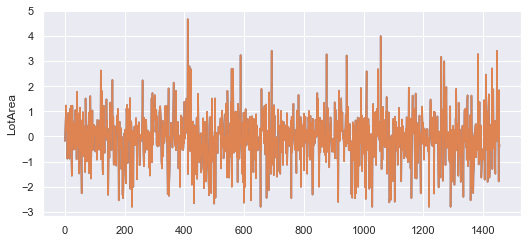

In [78]:
sns.lineplot(x=df_filtered_without_skewed_columns.index,y=df_filtered_without_skewed_columns.LotArea)
sns.lineplot(x=df_filtered_labelencode.index,y=df_filtered_labelencode.LotArea,palette='coolwarm')

## IMPORTING AND CREATING INSTANCE OF XGBOOST

In [79]:
import xgboost as xgb

In [80]:
model = xgb.XGBRegressor()

### SPLITTING THE DATA INTO INDEPENDENT AND DEPENDENT VARIABLE

In [81]:
x=df_filtered_labelencode.drop('SalePrice',axis=1)
y=df_filtered_labelencode.SalePrice

In [82]:
df_filtered_without_skewed_columns.SalePrice.mean()

11.976397844072984

## SELECTING IMPORTANT FEATURES

In [83]:
#pip install --upgrade scikit-learn --user


In [84]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
sfs_selector = SequentialFeatureSelector(estimator=LogisticRegression(), n_features_to_select = 45, cv =10, direction ='backward')
sfs_selector.fit(x, y)

SequentialFeatureSelector(cv=10, direction='backward',
                          estimator=LogisticRegression(),
                          n_features_to_select=45)

In [85]:
important_columns = x.columns[sfs_selector.get_support()]

### TRAIN,TEST SPLIT

In [86]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x[important_columns], y, test_size=0.3, random_state=101)

In [87]:
model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [88]:
pred=model.predict(x_test)

In [89]:
df_evaluated=pd.DataFrame({'Actual':y_test,'Predicted':pred})
df_evaluated.head()

Actual  Predicted
1119 11.80335   11.78030
356  12.06105   12.03533
945  11.73527   12.00754
1260 12.10625   12.11785
2    12.31717   12.32901

<AxesSubplot:ylabel='Predicted'>

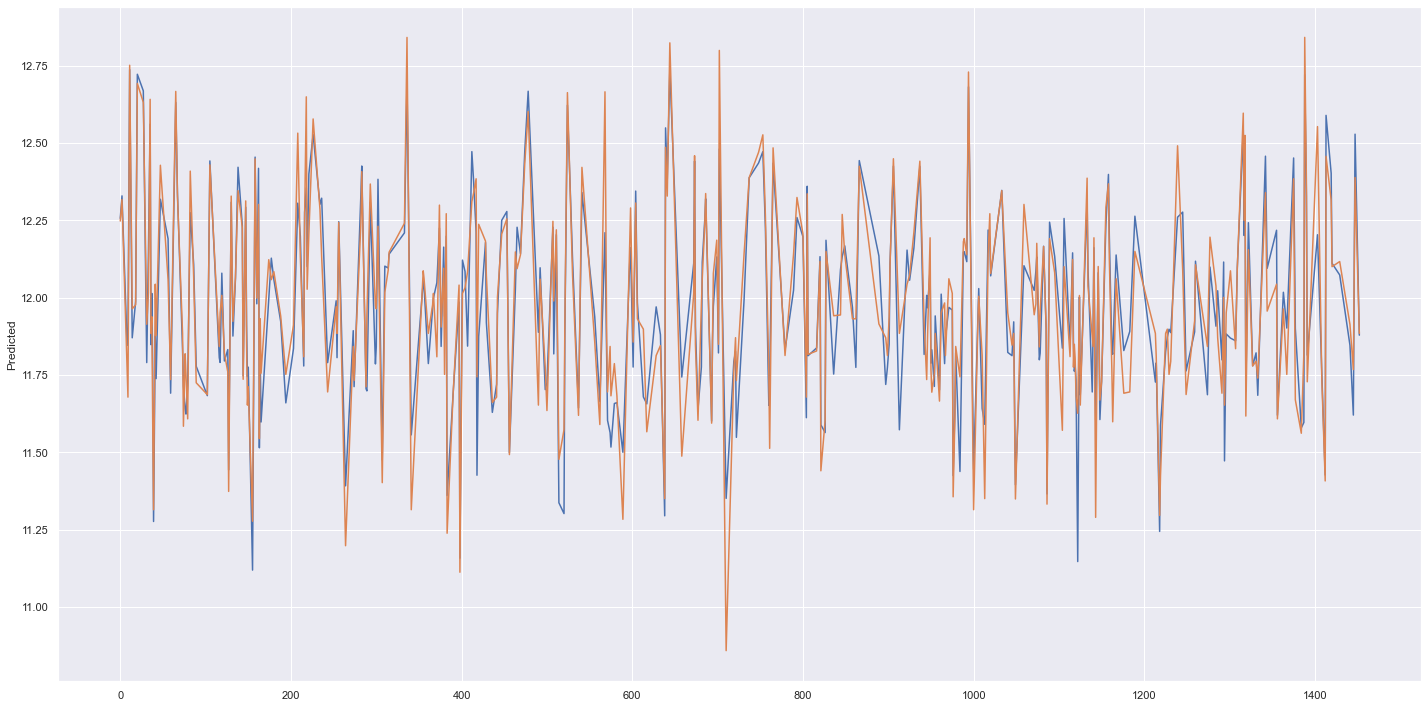

In [90]:
# plt.plot(df_evaluated.Predicted,'r')
plt.figure(figsize=(20,10))
sns.lineplot(x=df_evaluated.index,y=df_evaluated.Predicted,palette='viridis')
sns.lineplot(x=df_evaluated.index,y=df_evaluated.Actual)

In [91]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

In [92]:
rmse = np.sqrt(mean_squared_error(y_test, pred))
mae=mean_absolute_error(y_test,pred)
print('rmse:',rmse,'\n','mae:',mae)

rmse: 0.12134304284181473 
 mae: 0.08944534053222318


## CROSS VALIDATION

In [93]:
# compare the number of repeats for repeated k-fold cross-validation
from scipy.stats import sem
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
 
# evaluate a model with a given number of repeats
def evaluate_model(X, y, repeats):
    cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
    scores = cross_val_score(model, X, y, cv=cv, n_jobs=-1)
    return scores
 
repeats = range(1,16)
results = []
for r in repeats:
    scores = evaluate_model(x, y, r)
    print('>%d mean=%.4f se=%.3f' % (r, mean(scores), sem(scores)))
    results.append(scores)

>1 mean=0.8510 se=0.010
>2 mean=0.8492 se=0.007
>3 mean=0.8520 se=0.006
>4 mean=0.8526 se=0.005
>5 mean=0.8521 se=0.005
>6 mean=0.8517 se=0.004
>7 mean=0.8519 se=0.004
>8 mean=0.8534 se=0.003
>9 mean=0.8529 se=0.003
>10 mean=0.8528 se=0.003
>11 mean=0.8524 se=0.003
>12 mean=0.8527 se=0.003
>13 mean=0.8529 se=0.003
>14 mean=0.8529 se=0.003
>15 mean=0.8534 se=0.003


### Test Predictions

In [94]:
test_predictions = model.predict(df_filtered_test_labelencode[important_columns])

In [95]:
predictions = np.exp(test_predictions)

In [96]:
predictions

array([121584.12, 203039.38, 197235.73, ...,  96039.52, 117738.22,
       229910.12], dtype=float32)

In [97]:
df_predictions = pd.DataFrame(predictions)

In [98]:
df_predictions.index += 1

In [99]:
#df_predictions.to_csv('predictions.csv')